In this notebook I analyze the computer performance (level 1, 3, 5, 7,9, 11, 13, 15) against humans. 

In [1]:
import numpy as np
import random as random
import scipy
#using simpleguitk for display, is not needed for computer game
import simpleguitk as simplegui
import time
#new ones
import pandas as pd
#ml methods
from xgboost import XGBRegressor
from xgboost import XGBClassifier
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import os
#skyjo game classes and functions
from skyjo_functions4 import *
#own functions for machine learning
from ml_functions2 import *
#for plotting 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#for confidence intervalls
from scipy.stats import beta
#for splitting
from sklearn.model_selection import train_test_split
#confusing matrix
from sklearn.metrics import confusion_matrix

First, I look on rounds the smallest unit in which a winner can be determined. 

In [2]:
myPath='/home/tobias/ml-testing/games/skyjo'
list_input_files=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer1_0') or f.startswith('human_computer1_1')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files.sort()
#second computer implementation
list_input_files2=[f for f in os.listdir(myPath) 
    if f.startswith('human_computer3_0') and os.path.isfile(os.path.join(myPath, f))]
list_input_files2.sort()

In [3]:
res=np.zeros((7,len(list_input_files)))
deltahuman=0
deltacomputer=0
#list of results, currect ones need to 
listf=[]
for i in range(len(list_input_files)):
    file=np.loadtxt(list_input_files[i])   
    #get previous also to check that it is doe snot include also old input
    if i>0:
        ofile=np.loadtxt(list_input_files[i-1])  
        #append all if equal besides score or beyound game 50
        if sum(np.round(ofile[0:49,0]))!=sum(np.round(file[0:49,0])) or i>50:
            #add round number here 
            finfile=np.zeros((file.shape[0]+1,file.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file
            finfile[file.shape[0],:file.shape[1]]=i
            listf.append(finfile)
        else:
            #otherwise only append the difference
            finfile=np.zeros((file.shape[0]+1,file.shape[1]-ofile.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file[:,ofile.shape[1]:file.shape[1]]
            finfile[file.shape[0],:file.shape[1]]=i
            #chnage round number in it
            finfile[48]=range(finfile.shape[1])
            listf.append(finfile)
            #could add rounds from end, but better not since not possible in reality
    else:
        finfile=np.zeros((file.shape[0]+1,file.shape[1]))
        finfile[:file.shape[0],:file.shape[1]]=file
        finfile[file.shape[0],:file.shape[1]]=i
        listf.append(finfile)
    res[0,i]=i+1
    #number of turns is overall not set zero for new game from game 50 correct
    res[4,i]=finfile.shape[1]
    #start player #does not change in new game also from game 50 correct
    res[5,i]=finfile[0,0]

    #start player #does not change in new game also from game 50 correct
    res[5,i]=file[0,0]
    #last player
    res[6,i]=file[0,file.shape[1]-1]
    #always player 0, human first 
    if file[0,0]==0:
        res[1:3,i]=file[49:51,0]
    else:
        res[1,i]=file[50,0]
        res[2,i]=file[49,0]
    if res[1,i]<res[2,i]:
        #human winner mark
        res[3,i]=1
        #to calculate by how much a  human wins in average 
        deltahuman+=(res[2,i]-res[1,i])
    else:
        deltacomputer+=(res[1,i]-res[2,i])

#print array
#the longest length of 78 was when i tested the vanihsing cards on purpose
print(res.T)        
#print number of elements in list
print(len(listf))

[[  1.  24.  46.   1.  30.   0.   1.]
 [  2.  36.   9.   0.  32.   0.   1.]
 [  3.  78.  24.   0.  31.   1.   1.]
 [  4.  11.  49.   1.  24.   0.   1.]
 [  5.   9.  22.   1.  26.   0.   1.]
 [  6.  13.  28.   1.  78.   1.   1.]
 [  7.   9.  19.   1.  41.   1.   1.]
 [  8.  10.  30.   1.  33.   1.   1.]
 [  9.  32.   8.   0.  31.   1.   1.]
 [ 10.  20.  24.   1.  41.   1.   1.]
 [ 11.  22.  34.   1.  34.   0.   1.]
 [ 12.  17.  41.   1.  34.   0.   1.]
 [ 13.  27.  29.   1.  27.   0.   1.]
 [ 14.  46.  15.   0.  31.   0.   1.]
 [ 15.  11.  23.   1.  32.   0.   1.]
 [ 16.  12.  36.   1.  24.   0.   1.]
 [ 17.  16.  22.   1.  35.   1.   1.]
 [ 18.  36.   4.   0.  36.   1.   1.]
 [ 19.  19.  28.   1.  24.   1.   1.]
 [ 20.  18.  32.   1.  36.   1.   1.]
 [ 21.  26.  13.   0.  36.   1.   1.]
 [ 22.  10.  55.   1.  27.   1.   1.]
 [ 23.  28.  41.   1.  36.   1.   1.]
 [ 24.  20.  65.   1.  24.   1.   1.]
 [ 25.  29.  39.   1.  26.   1.   1.]
 [ 26.  35.  45.   1.  28.   1.   1.]
 [ 27.  24. 

In [4]:
res2=np.zeros((7,len(list_input_files2)))
deltahuman2=0
deltacomputer2=0
#list of results, currect ones need to 
listf2=[]
for i in range(len(list_input_files2)):
    file=np.loadtxt(list_input_files2[i])   
    #get previous also to check that it is doe snot include also old input
    if i>0:
        ofile=np.loadtxt(list_input_files2[i-1])  
        #append all if equal besides score or beyound game 50
        if sum(np.round(ofile[0:49,0]))!=sum(np.round(file[0:49,0])) or i>50:
            #add round number here 
            finfile=np.zeros((file.shape[0]+1,file.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file
            finfile[file.shape[0],:file.shape[1]]=i
            listf2.append(finfile)
        else:
            #otherwise only append the difference
            finfile=np.zeros((file.shape[0]+1,file.shape[1]-ofile.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file[:,ofile.shape[1]:file.shape[1]]
            finfile[file.shape[0],:file.shape[1]]=i
            #chnage round number in it
            finfile[48]=range(finfile.shape[1])
            listf2.append(finfile)
            #could add rounds from end, but better not since not possible in reality
    else:
        finfile=np.zeros((file.shape[0]+1,file.shape[1]))
        finfile[:file.shape[0],:file.shape[1]]=file
        finfile[file.shape[0],:file.shape[1]]=i
        listf2.append(finfile)
    res2[0,i]=i+1
    #number of turns is overall not set zero for new game from game 50 correct
    res2[4,i]=finfile.shape[1]
    #start player #does not change in new game also from game 50 correct
    res2[5,i]=finfile[0,0]

    #start player #does not change in new game also from game 50 correct
    res2[5,i]=file[0,0]
    #last player
    res2[6,i]=file[0,file.shape[1]-1]
    #always player 0, human first 
    if file[0,0]==0:
        res2[1:3,i]=file[49:51,0]
    else:
        res2[1,i]=file[50,0]
        res2[2,i]=file[49,0]
    if res2[1,i]<res2[2,i]:
        #human winner mark
        res2[3,i]=1
        #to calculate by how much a  human wins in average 
        deltahuman2+=(res2[2,i]-res2[1,i])
    else:
        deltacomputer2+=(res2[1,i]-res2[2,i])

#print array
#the longest length of 78 was when i tested the vanihsing cards on purpose
print(res2.T)        
#print number of elements in list
print(len(listf2))

[[  1.  10.  41.   1.  28.   0.   1.]
 [  2.  28. 130.   1.  21.   0.   0.]
 [  3.  15.  16.   1.  28.   0.   1.]
 [  4.  18.  39.   1.  24.   0.   1.]
 [  5.  42.  28.   0.  27.   0.   0.]
 [  6.  20.  53.   1.  25.   1.   1.]
 [  7.  25.  37.   1.  24.   0.   1.]
 [  8.  21.  68.   1.  25.   1.   1.]
 [  9.  58. 150.   1.  22.   1.   0.]
 [ 10.  46.  32.   0.  22.   1.   0.]
 [ 11.  38.  55.   1.  25.   1.   1.]
 [ 12.  48.  35.   0.  24.   1.   0.]
 [ 13.  24.  39.   1.  28.   0.   1.]
 [ 14.  43. 126.   1.  21.   0.   0.]
 [ 15.  37. 124.   1.  24.   1.   0.]
 [ 16.  17. 132.   1.  26.   1.   0.]
 [ 17.  39.  96.   1.  21.   0.   0.]
 [ 18.  41.  96.   1.  20.   1.   0.]
 [ 19.  32.  76.   1.  23.   1.   1.]
 [ 20.  43. 120.   1.  20.   1.   0.]
 [ 21.  48. 134.   1.  21.   0.   0.]
 [ 22.  31.  32.   1.  38.   0.   1.]
 [ 23.  18.  39.   1.  29.   1.   1.]
 [ 24.  27.  98.   1.  25.   0.   0.]]
24


In [5]:
#convert lists of differnet lengths consistent of different arrays of same shape[0] but different shape[1]
def lists_arrays_to_one(listf,int2=True):
    #determine length of output
    c=0
    for i in range(len(listf)):
        c+=listf[i].shape[1]
        #create array
    ar=np.zeros((listf[0].shape[0],c))   
    c=0
    #now fill it
    for i in range(len(listf)):
        if int2==True:
            ar[:,c:c+listf[i].shape[1]]=np.round(listf[i])
        else:
            ar[:,c:c+listf[i].shape[1]]=np.round(listf[i])
        c+=listf[i].shape[1]
    return ar     

In [6]:
ar=lists_arrays_to_one(listf)
print(ar.shape)

(52, 3565)


In [7]:
print("with computer level 1")
print(f"the human won {int(sum(res[3]))} times of {res.shape[1]} rounds")

print(f"the human average is {round(np.mean(res[1]),3)} points")
                       
print(f"the computer average is {round(np.mean(res[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(res[2]-res[1]),3)} points")
print(f"the human wins to {round(np.mean(res[3]*100),1)} %")
#average win is by to be determine deltapoints
print(f"human average adventage {round(deltahuman/sum(res[3]),3)} points")
print(f"computer average adventage {round(deltacomputer/(res.shape[1]-sum(res[3])),3)} points")
print("with computer level 3")
print(f"the human won {int(sum(res2[3]))} times of {res2.shape[1]} rounds")
print(f"the human average is {round(np.mean(res2[1]),3)} points")
print(f"the computer average is {round(np.mean(res2[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(res2[2]-res2[1]),3)} points")
print(f"the human wins to {round(np.mean(res2[3]*100),1)} %")
#average win is by to be determine deltapoints
print(f"human average adventage {round(deltahuman2/sum(res2[3]),3)} points")
print(f"computer average adventage {round(deltacomputer2/(res2.shape[1]-sum(res2[3])),3)} points")

with computer level 1
the human won 89 times of 112 rounds
the human average is 27.562 points
the computer average is 35.268 points
the human average adventage is  7.705 points
the human wins to 79.5 %
human average adventage 18.427 points
computer average adventage 33.783 points
with computer level 3
the human won 21 times of 24 rounds
the human average is 32.042 points
the computer average is 74.833 points
the human average adventage is  42.792 points
the human wins to 87.5 %
human average adventage 50.857 points
computer average adventage 13.667 points


It seems that level 3 is not an improvement compared to level 1. 

In [8]:
#name of columns
columns=['acting_player']
columns.append('open_pile_card')
for i in range(15):
    columns.append('number_of_'+str(i-2)+'_in_open')
columns.append('number_of_cards_in_closed')
for i in range(12):
    columns.append('own_cards_'+str(i))
for i in range(12):
    columns.append('other_player_cards_'+str(i))    
columns.append('action_take_open')
columns.append('action_discard')
columns.append('discard_value')
columns.append('id_player_card')
columns.append('numeric_player_card') 
columns.append('vanish_marker')
columns.append('turn')
columns.append('score_self')
columns.append('score_other')
columns.append('round_number')
print(len(columns),columns)
for i in range(43,52):
    print(i)
    print(columns[i],ar[i])   

52 ['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker

In [9]:
#create data frame 
df = pd.DataFrame(data = ar.T, index=range(ar.shape[1]),columns = columns)
print(df.head())

   acting_player  open_pile_card  number_of_-2_in_open  number_of_-1_in_open  \
0            0.0             4.0                   0.0                   0.0   
1            1.0             5.0                   0.0                   0.0   
2            0.0            -1.0                   0.0                   0.0   
3            1.0             8.0                   0.0                   0.0   
4            0.0             2.0                   0.0                   0.0   

   number_of_0_in_open  number_of_1_in_open  number_of_2_in_open  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   number_of_3_in_open  number_of_4_in_open  number_of_5_in_open  ...  \
0                  0.0               

Text(0, 0.5, 'human score-computer score [points]')

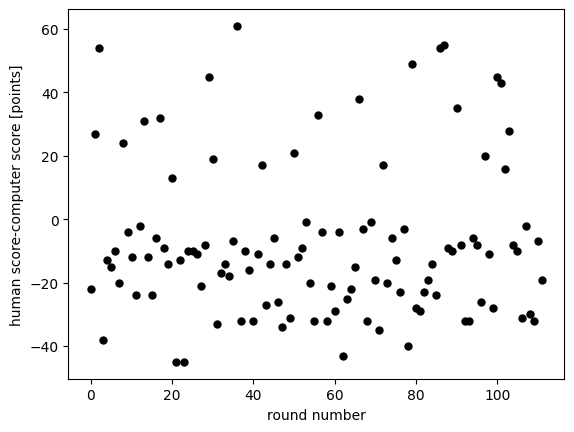

In [10]:
#slect only human
df2=df[df.acting_player==0].groupby(df.round_number).max()
plt.plot(df2.round_number,df2.score_self-df2.score_other,'o',ms=5,color='black') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("round number")
plt.ylabel("human score-computer score [points]")

In the results above it is visible that the human wins (or below 0) partly with only a small adventage while that never happends for then computer. That is because the computer finhss first, when the computer win he has no only the lowest number of points but also the points of the human are doubled causing that there is a gap just over zero. 

Text(0.5, 0, 'human score-computer score [points]')

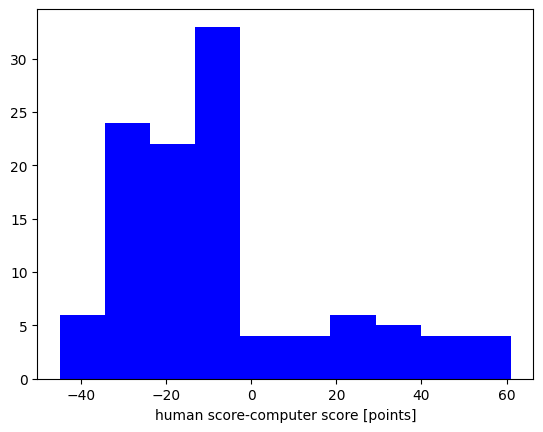

In [11]:
#df2.score_self.plot(kind='hist')
#df2.score_other.plot(kind='hist')
plt.hist(df2.score_self-df2.score_other,color='blue') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("number of occurancies")
plt.xlabel("human score-computer score [points]")

Now I look on full games in level 1, 3 and 5, 7. That is more important because since games is fianl unit of skyjo.

In [12]:
myPath='/home/tobias/ml-testing/games/skyjo'
list_input_files_l1=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer1_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l1.sort()
print(list_input_files_l1)

list_input_files_l3=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer3_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l3.sort()
print(list_input_files_l3)

list_input_files_l5=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer5_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l5.sort()
print(list_input_files_l5)

list_input_files_l7=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer7_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l7.sort()
print(list_input_files_l7)

list_input_files_l9=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer9_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l9.sort()
print(list_input_files_l9)

list_input_files_l11=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer11_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l11.sort()
print(list_input_files_l11)

list_input_files_l13=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer13_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l13.sort()
print(list_input_files_l13)

list_input_files_l15=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer15_g')) and os.path.isfile(os.path.join(myPath, f))]
list_input_files_l15.sort()
print(list_input_files_l15)

['human_computer1_g001.txt', 'human_computer1_g002.txt', 'human_computer1_g003.txt', 'human_computer1_g004.txt', 'human_computer1_g005.txt', 'human_computer1_g006.txt', 'human_computer1_g007.txt', 'human_computer1_g008.txt', 'human_computer1_g009.txt', 'human_computer1_g010.txt', 'human_computer1_g011.txt', 'human_computer1_g012.txt', 'human_computer1_g013.txt', 'human_computer1_g014.txt', 'human_computer1_g015.txt', 'human_computer1_g016.txt', 'human_computer1_g017.txt', 'human_computer1_g018.txt', 'human_computer1_g019.txt', 'human_computer1_g020.txt', 'human_computer1_g021.txt', 'human_computer1_g022.txt', 'human_computer1_g023.txt', 'human_computer1_g024.txt', 'human_computer1_g025.txt', 'human_computer1_g026.txt', 'human_computer1_g027.txt', 'human_computer1_g028.txt', 'human_computer1_g029.txt', 'human_computer1_g030.txt', 'human_computer1_g031.txt', 'human_computer1_g032.txt', 'human_computer1_g033.txt']
['human_computer3_g001.txt', 'human_computer3_g002.txt', 'human_computer3_g

In [13]:
#input file list and integer for computer level  
def get_game_stat(file_list,int2):
    resl1=np.zeros((7,len(file_list)))
    deltahuman=0
    deltacomputer=0
    #list of results, currect ones need to 
    for i in range(len(file_list)):
        finfile=np.loadtxt(file_list[i])   
        #get previous also to check that it is doe snot include also old input
        resl1[0,i]=i+1
        #number of turns 
        resl1[4,i]=finfile.shape[1]
        #number of rounds
        resl1[5,i]=finfile[51,finfile.shape[1]-1]+1
        #get scores of all games added together
        scores=np.zeros((2,int(resl1[5,i])))
        for j in range(finfile.shape[1]):
            if finfile[0,j]==0:
                scores[0:2,int(finfile[51,j])]=finfile[49:51,j]
            else:
                scores[0,int(finfile[51,j])]=finfile[50,j]
                scores[1,int(finfile[51,j])]=finfile[49,j]           
        #always player 0, human first 
        resl1[1,i]=sum(scores[0,:])
        resl1[2,i]=sum(scores[1,:])
                    
        if finfile[0,0]==0:
            #human winner mark
            resl1[3,i]=finfile[52,0]
        else:
            resl1[3,i]=finfile[53,0]
        resl1[6,:]=int2     
    return resl1       

In [14]:
resl1=get_game_stat(list_input_files_l1,1)
print("human against computer level 1")
print(f"the human won {int(sum(resl1[3]))} times of {resl1.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl1[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl1[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl1[2]-resl1[1]),3)} points")
print(f"the human wins to {round(np.mean(resl1[3]*100),1)} %")
print("")
resl3=get_game_stat(list_input_files_l3,3)
print("human against computer level 3")
print(f"the human won {int(sum(resl3[3]))} times of {resl3.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl3[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl3[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl3[2]-resl3[1]),3)} points")
print(f"the human wins to {round(np.mean(resl3[3]*100),1)} %")
print("")
resl5=get_game_stat(list_input_files_l5,5)
print("human against computer level 5")
print(f"the human won {int(sum(resl5[3]))} times of {resl5.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl5[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl5[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl5[2]-resl5[1]),3)} points")
print(f"the human wins to {round(np.mean(resl5[3]*100),1)} %")
print(" ")
resl7=get_game_stat(list_input_files_l7,7)
print("human against computer level 7")
print(f"the human won {int(sum(resl7[3]))} times of {resl7.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl7[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl7[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl7[2]-resl7[1]),3)} points")
print(f"the human wins to {round(np.mean(resl7[3]*100),1)} %")
print(" ")
resl9=get_game_stat(list_input_files_l9,9)
print("human against computer level 9")
print(f"the human won {int(sum(resl9[3]))} times of {resl9.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl9[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl9[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl9[2]-resl9[1]),3)} points")
print(f"the human wins to {round(np.mean(resl9[3]*100),1)} %")
print(" ")
resl11=get_game_stat(list_input_files_l11,11)
print("human against computer level 11")
print(f"the human won {int(sum(resl11[3]))} times of {resl11.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl11[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl11[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl11[2]-resl11[1]),3)} points")
print(f"the human wins to {round(np.mean(resl11[3]*100),1)} %")
print(" ")
resl13=get_game_stat(list_input_files_l13,13)
print("human against computer level 13")
print(f"the human won {int(sum(resl13[3]))} times of {resl13.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl13[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl13[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl13[2]-resl13[1]),3)} points")
print(f"the human wins to {round(np.mean(resl13[3]*100),1)} %")
print(" ")
resl15=get_game_stat(list_input_files_l15,15)
print("human against computer level 15")
print(f"the human won {int(sum(resl15[3]))} times of {resl15.shape[1]} rounds")
print(f"the human average is {round(np.mean(resl15[1]),3)} points")                      
print(f"the computer average is {round(np.mean(resl15[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(resl15[2]-resl15[1]),3)} points")
print(f"the human wins to {round(np.mean(resl15[3]*100),1)} %")

human against computer level 1
the human won 25 times of 33 rounds
the human average is 82.242 points
the computer average is 111.758 points
the human average adventage is  29.515 points
the human wins to 75.8 %

human against computer level 3
the human won 21 times of 21 rounds
the human average is 54.81 points
the computer average is 150.381 points
the human average adventage is  95.571 points
the human wins to 100.0 %

human against computer level 5
the human won 76 times of 102 rounds
the human average is 86.843 points
the computer average is 109.127 points
the human average adventage is  22.284 points
the human wins to 74.5 %
 
human against computer level 7
the human won 21 times of 21 rounds
the human average is 59.381 points
the computer average is 131.19 points
the human average adventage is  71.81 points
the human wins to 100.0 %
 
human against computer level 9
the human won 20 times of 20 rounds
the human average is 67.45 points
the computer average is 116.05 points
the hum

Text(0, 0.5, 'computer score [points]')

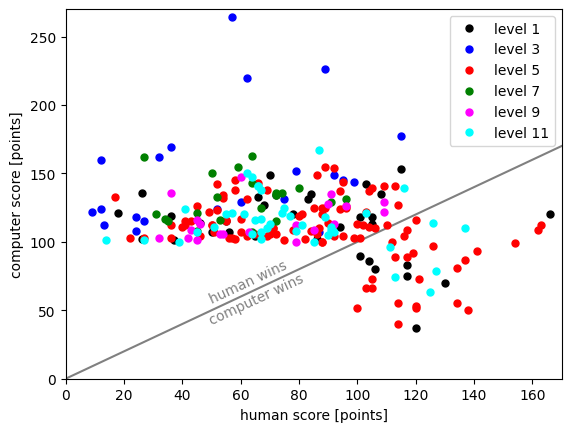

In [15]:
li=[0,300]
plt.plot(li,li,'-',ms=5,color='gray') 
plt.plot(resl1[1,:],resl1[2,:],'o',ms=5,color='black',label='level 1') 
plt.plot(resl3[1,:],resl3[2,:],'o',ms=5,color='blue',label='level 3') 
plt.plot(resl5[1,:],resl5[2,:],'o',ms=5,color='red',label='level 5') 
plt.plot(resl7[1,:],resl7[2,:],'o',ms=5,color='green',label='level 7') 
plt.plot(resl9[1,:],resl9[2,:],'o',ms=5,color='magenta',label='level 9') 
plt.plot(resl11[1,:],resl11[2,:],'o',ms=5,color='cyan',label='level 11') 
plt.text(50, 55, 'human wins', color='gray',rotation=25, rotation_mode='anchor')
plt.text(50, 40, 'computer wins', color='gray',rotation=25, rotation_mode='anchor')
plt.legend(loc="best")
plt.xscale("linear")
plt.xlim(0,170)
plt.ylim(0,270)
plt.xlabel("human score [points]")
plt.ylabel("computer score [points]")

Text(0, 0.5, 'computer-human score [points]')

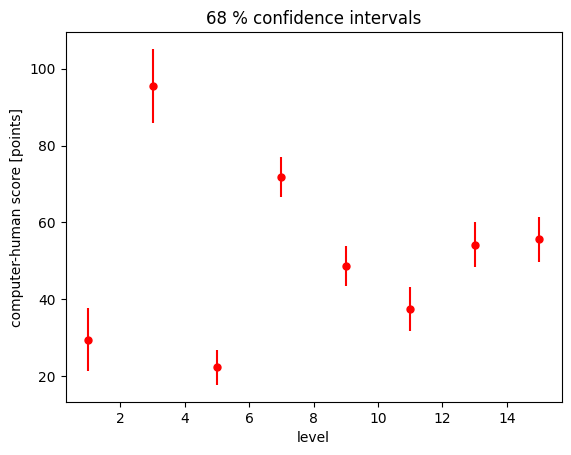

In [16]:
list_res=[resl1,resl3,resl5,resl7,resl9,resl11,resl13,resl15]
stat=np.zeros((6,len(list_res)))
for i in range(len(list_res)):
    stat[0,i]=list_res[i][6,0]
    stat[1,i]=np.mean(list_res[i][2,:]-list_res[i][1,:])
    stat[2,i]=np.std(list_res[i][2,:]-list_res[i][1,:])/np.sqrt(list_res[i].shape[1])
    stat[3,i]=np.mean(list_res[i][3]) 
    alpha=0.317
    k=int(np.sum(list_res[i][3]))
    n=list_res[i].shape[1]
    p_u, p_o = beta.ppf([alpha/2, 1 - alpha/2], [k, k + 1], [n - k + 1, n - k])
    stat[4,i]=p_u
    stat[5,i]=p_o
    if np.isnan(stat[5,i]):
        stat[5,i]=1
lower_error =  stat[3]-stat[4,:]
upper_error =  stat[5,:]-stat[3]
asymmetric_error = np.array([lower_error,upper_error])
plt.errorbar(stat[0,:],stat[1,:], yerr=stat[2,:],ms=5, fmt='o',color='red')
plt.xscale("linear")
plt.xlabel("level")
plt.title("68 % confidence intervals")
plt.ylabel("computer-human score [points]")

Text(0, 0.5, '% human wins')

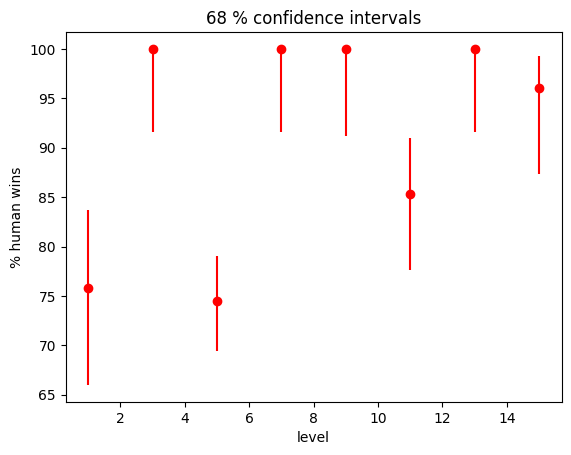

In [17]:
plt.errorbar(stat[0,:],100*stat[3,:], yerr=asymmetric_error*100, fmt='o', color = 'red')   
plt.xscale("linear")
plt.xlabel("level")
plt.title("68 % confidence intervals")
plt.ylabel("% human wins")

The computer in level 3 and 7 performs worse, the computer never wins there and the average points are also similar. The computer is better in level 1 and 5, it wins about 1/4, enough that the game makes fun. 
There is no improvement of level 5 to 1 visisble. There still could be a small improvement, the errorbars overlap. However it can only be so small that it is an interesting improvement, which would be equal changes for human and computer. 

Level 9 and 11 which are trained on human games (9 imitating humans, 11 the winner in human against comouter games) perform also not so well. Level 9 seems to be always winnable, level 11 is better, but likely still easier than than level 1 and 5. Thus the learning from human experience did not work so well. Likely a contributing factor is that training was difficult with only 279 independent data sets (games or stand alone rounds). 

With that number likely too many feature were used at least for the classification steps. Thus, as the next step I will reduce the number of feature, excluding ones with low importance in the current fit. 

That is level 13 and 15, but that is not improving likely even getting worse

Here I check whether the played card always gets on top of the open pile. 

In [18]:
#yes the differences are when one vanishes
for i in range(len(list_input_files_l11)):
    a=np.loadtxt(list_input_files_l11[i])
    print(f"game {i}")
    for j in range(1,a.shape[1]):
        if(a[51,j]==a[51,j-1]):
            if(int(a[46,j-1])!=20  and int(a[46,j-1])!=int(a[1,j])):
                print(f"previosly vanishing is {bool(a[47,j-1])}")
                print(f"open pile card is {int(a[1,j])} previosly played card is {int(a[46,j-1])}")
# human_computer11_g033.txt  has suspected mistake back giving at the beginning                

game 0
previosly vanishing is True
open pile card is 4 previosly played card is -1
game 1
previosly vanishing is True
open pile card is 4 previosly played card is 1
game 2
previosly vanishing is True
open pile card is 3 previosly played card is 2
previosly vanishing is True
open pile card is 5 previosly played card is 0
previosly vanishing is True
open pile card is 3 previosly played card is 4
game 3
previosly vanishing is True
open pile card is 5 previosly played card is 4
game 4
game 5
previosly vanishing is True
open pile card is 0 previosly played card is 5
game 6
game 7
previosly vanishing is True
open pile card is 5 previosly played card is 0
game 8
previosly vanishing is True
open pile card is 8 previosly played card is 6
previosly vanishing is True
open pile card is 6 previosly played card is 8
game 9
game 10
previosly vanishing is True
open pile card is 3 previosly played card is 0
game 11
previosly vanishing is True
open pile card is 5 previosly played card is 4
previosly van

In [19]:
a=np.loadtxt('human_computer11_g033.txt')
#checking same card appear when not played before (look like that happens too often)
#looks all fine is just happeing sometimes that three same as close (other player in between makes it easier )
for i in range(7):
    print(f"player {int(a[0,i])} open card is {int(a[1,i])} in closed {int(a[17,i])} below in open are {int(sum(a[2:17,i]))}")
    print(f"acting player cards {np.round(a[18:30,i])}")
    print(f"take open is {bool(a[42,i])}")
    print(f"discard closed is {bool(a[43,i])}")
    if a[44,i]!=30:
        print(f"closed card value is {int(a[44,i])}")
    print(f"played card value is {int(a[46,i])}")    
    print(f"card vanishing is {bool(a[47,i])}")    

player 0 open card is 10 in closed 125 below in open are 0
acting player cards [20. 20. 20. 20. 20.  3. 10. 20. 20. 20. 20. 20.]
take open is True
discard closed is False
played card value is 20
card vanishing is False
player 1 open card is 9 in closed 125 below in open are 0
acting player cards [20. 20. 20. 10. 20. 20.  1. 20. 20. 20. 20. 20.]
take open is False
discard closed is False
closed card value is 12
played card value is 20
card vanishing is False
player 0 open card is 2 in closed 124 below in open are 1
acting player cards [20. 20. 10. 20. 20.  3. 10. 20. 20. 20. 20. 20.]
take open is True
discard closed is False
played card value is 20
card vanishing is False
player 1 open card is 8 in closed 124 below in open are 1
acting player cards [12. 20. 20. 10. 20. 20.  1. 20. 20. 20. 20. 20.]
take open is False
discard closed is False
closed card value is 9
played card value is 10
card vanishing is False
player 0 open card is 10 in closed 123 below in open are 2
acting player cards

Below I check how good the models are to predict points in the rounds against humans. 

In [20]:
#columns used in model 
level1_2players_columns=np.loadtxt("xgb_model1_column2.txt")
#the score columns need to be marked back 
sel1=np.copy(level1_2players_columns)
#the score columns set to 1 since need to be output
sel1[49:51]=1

#model file needed to run (is in included in function library not needed here but is so more visible) 
level1_2players_model = XGBRegressor()
level1_2players_model.load_model("xgb_model2.json")
level1_2players_modelb = XGBRegressor()
level1_2players_modelb.load_model("xgb_model3.json")
level1_2players_modelc = XGBRegressor()
level1_2players_modelc.load_model("xgb_model4.json")
print(len(level1_2players_columns),sum(level1_2players_columns))
#get prediction
for_xgb=np.zeros((int(sum(level1_2players_columns)),df.shape[0]))
counter=0
for i in range(len(level1_2players_columns)):
    if level1_2players_columns[i]==1:
        for_xgb[counter]=df.iloc[:,i]
        counter+=1
print(counter)   
print(for_xgb.shape)
print(for_xgb)

51 30.0
30
(30, 3565)
[[ 4.  5. -1. ...  7.  6. 11.]
 [20. -1. 20. ... 20. -1. 20.]
 [20. 20. 20. ... 20.  2. 20.]
 ...
 [30.  2. 30. ... 12. 11.  6.]
 [ 4.  0.  7. ...  4. 11.  4.]
 [ 5. -1.  8. ...  6. 20. 12.]]


In [21]:
res=level1_2players_model.predict(for_xgb.T)
resb=level1_2players_modelb.predict(for_xgb.T)

Text(0.5, 1.0, 'xgboost fitted to random acting computer')

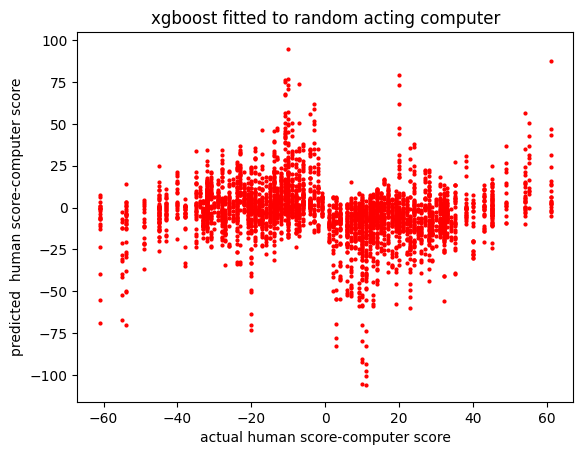

In [22]:
plt.plot( df.score_self-df.score_other,res,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost fitted to random acting computer")

Text(0.5, 1.0, 'xgboost fitted to improved acting computer')

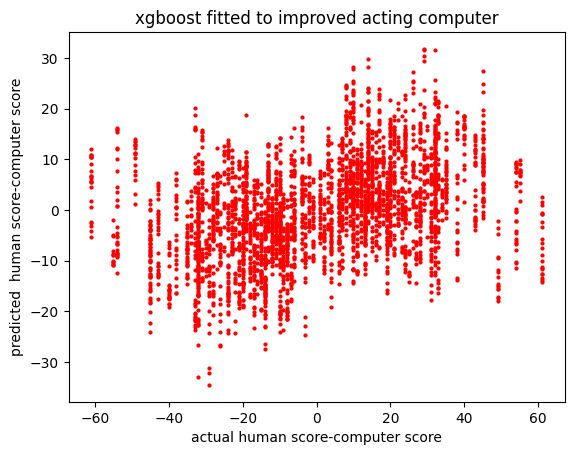

In [23]:
plt.plot( df.score_self-df.score_other,resb,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost fitted to improved acting computer")

The model fitted to the improbved acting computer looks clearly better, there is a positivecorrelation visible while there is nothing or a negative correlation visible for the other. 

In [24]:
print(f"standard deviation data {np.round(np.std(df.score_self-df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(df.score_self-df.score_other),3)}")
print("Model 1")
print(f"standard deviation data-model {np.round(np.std(res-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(res-df.score_self-df.score_other),3)}")
print("Model 2")
print(f"standard deviation data-model {np.round(np.std(resb-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resb-df.score_self-df.score_other),3)}")

standard deviation data 25.039
median deviation data 19.0
Model 1
standard deviation data-model 31.639
median deviation data 18.17
Model 2
standard deviation data-model 23.084
median deviation data 15.781


The prediction is rather bad for the xgboost model fitted to the random data, when subtracting it from the score increase the standard deviation instead to decrease it as when it worked as it is the case on computer data. The median deviation looks better, there the deviation reduces slightly, thus just a few cases are really badly predicted. 

The similar xgbmodel fitted to improved computer actions fairs better, it reduces most measures of performances

Other ideas use both xgb (more feature engeering on it, change to vanished card n explict feature, likely small N cause a problem) for the next iteration. deep learning only if it is better on the training data.

If that does not decrease predictions, then train on human data, more simple model needed, maybe xgb or linear with good features. 

In [25]:
df['own_n_closed']=df.loc[:,'own_cards_0':'own_cards_11'][df.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
#now n_open isstead because small n_vanished likely cases pron=blem in deep learning
df['own_n_open']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=30) & (df.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df['own_max']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=20) & (df.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df['own_sum']=df.loc[:,'own_cards_0':'own_cards_11'][(df.loc[:,'own_cards_0':'own_cards_11']!=20) & (df.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df['other_player_n_closed']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][df.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df['other_player_n_open']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)
df['other_player_max']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df['other_player_sum']=df.loc[:,'other_player_cards_0':'other_player_cards_11'][(df.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)


In [26]:
#feature negering to better columns
newcolumns=['open_pile_card', 'own_n_closed', 'own_n_open', 'own_max',
       'own_sum', 'other_player_n_closed', 'other_player_n_open',
       'other_player_max', 'other_player_sum', 'action_take_open', 'action_discard',
       'discard_value','numeric_player_card', 'score_self',
       'score_other', 'round_number']
df2=df.loc[:,newcolumns]
#excloding target columns and round
df3=df.loc[:,newcolumns[0:13]]

In [27]:
resc=level1_2players_modelc.predict(df3)

Text(0.5, 1.0, 'xgboost on feature engering fitted to improved acting computer')

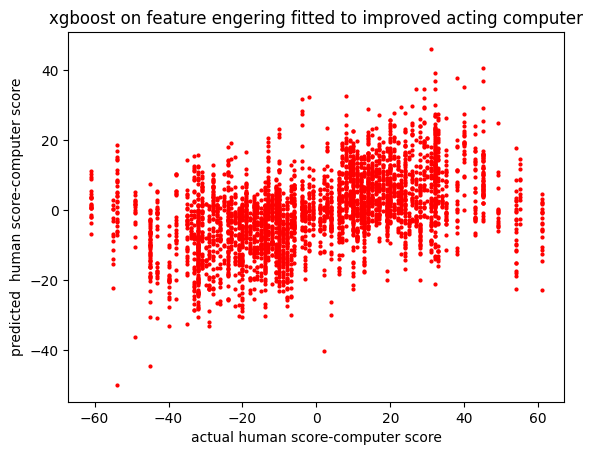

In [28]:
plt.plot( df.score_self-df.score_other,resc,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")
plt.title("xgboost on feature engering fitted to improved acting computer")

In [29]:
print(f"standard deviation data {np.round(np.std(df.score_self-df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(df.score_self-df.score_other),3)}")
print("Model 1")
print(f"standard deviation data-model {np.round(np.std(res-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(res-df.score_self-df.score_other),3)}")
print("Model 2")
print(f"standard deviation data-model {np.round(np.std(resb-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resb-df.score_self-df.score_other),3)}")
print("Model 3")
print(f"standard deviation data-model {np.round(np.std(resc-df.score_self+df.score_other),3)}")
print(f"median deviation data {np.round(scipy.stats.median_abs_deviation(resc-df.score_self-df.score_other),3)}")

standard deviation data 25.039
median deviation data 19.0
Model 1
standard deviation data-model 31.639
median deviation data 18.17
Model 2
standard deviation data-model 23.084
median deviation data 15.781
Model 3
standard deviation data-model 22.224
median deviation data 16.108


The two xgboost models based on the same data perform somewhat similar, the one using the data directly has a smaller median deviation, the other a smaller deviation deviation. 

In [30]:
feature_train2,feature_test2, target_train2,target_test2=split_test(df2.iloc[:,0:13],df2.score_self-df2.score_other, df2.iloc[:,15],0.6)

2139
2148


In [31]:
ar=do_xgb(feature_train2, target_train2, feature_test2, target_test2,6,reg=0)
print(ar)

xgb took 0.1951 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 27.4042 points
standard deviation of prediction-train 5.689 points
[ 0.          6.          5.68904372 27.40418715]


In [32]:
loop_reg(feature_train2, target_train2, feature_test2, target_test2,4,1,1.414,25,"xgb_human1_maxd04.txt")

doing case 0
xgb took 0.1728 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.7528 points
standard deviation of prediction-train 13.7311 points
doing case 1
xgb took 0.1813 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.8047 points
standard deviation of prediction-train 13.9161 points
doing case 2
xgb took 0.0737 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 26.0911 points
standard deviation of prediction-train 13.7356 points
doing case 3
xgb took 0.1551 seconds
standard deviation of test 25.9178 points
standard deviation of train 24.4426  points
standard deviation of prediction-test 25.9185 points
standard deviation of prediction-train 13.9202 points
doing case 4
xgb took 0.0542 seconds
standard deviation of test 25.9178 points
s

In [33]:
hum1=np.loadtxt("xgb_human1_maxd01.txt")
hum2=np.loadtxt("xgb_human1_maxd02.txt")
hum3=np.loadtxt("xgb_human1_maxd03.txt")
hum4=np.loadtxt("xgb_human1_maxd04.txt")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum1[3]),4)} of max-depth=1")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum2[3]),4)} of max-depth=2")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum3[3]),4)} of max-depth=3")
print(f"minimum standard deviation of (prediction-test data) {round(min(hum4[3]),4)} of max-depth=4")

minimum standard deviation of (prediction-test data) 23.4487 of max-depth=1
minimum standard deviation of (prediction-test data) 23.4124 of max-depth=2
minimum standard deviation of (prediction-test data) 23.5616 of max-depth=3
minimum standard deviation of (prediction-test data) 23.7237 of max-depth=4


Text(0, 0.5, 'standard deviation of data-prediction [points]')

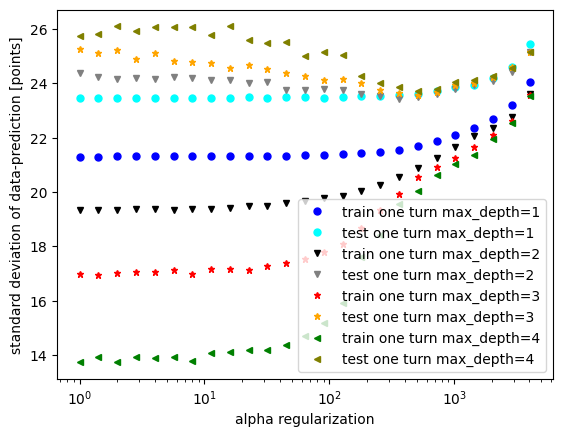

In [34]:
plt.plot(hum1[0],hum1[2],'o',ms=5,color='blue',label='train one turn max_depth=1') 
plt.plot(hum1[0],hum1[3],'o',ms=5,color='cyan',label='test one turn max_depth=1')
plt.plot(hum2[0],hum2[2],'v',ms=5,color='black',label='train one turn max_depth=2') 
plt.plot(hum2[0],hum2[3],'v',ms=5,color='gray',label='test one turn max_depth=2')
plt.plot(hum3[0],hum3[2],'*',ms=5,color='red',label='train one turn max_depth=3') 
plt.plot(hum3[0],hum3[3],'*',ms=5,color='orange',label='test one turn max_depth=3')
plt.plot(hum4[0],hum4[2],'<',ms=5,color='green',label='train one turn max_depth=4') 
plt.plot(hum4[0],hum4[3],'<',ms=5,color='olive',label='test one turn max_depth=4')
plt.legend(loc="best")
plt.xscale("log")
#plt.ylim(55,65)
plt.xlabel("alpha regularization")
plt.ylabel("standard deviation of data-prediction [points]")

Taring an xgboost model on the human is worse in the prediction than both models trained on advanced computer settings. 

I could explore more complicated models but could also first implement the otehr xgbbosst, espeically the one
without feature engering needs just a different input file as name. 

In [35]:
#check how model in actual application fares
#linear regression on each action option separately?  a lot of work and seem not machine learning
print(df2)
dftake=df2[df2.action_take_open==1]

      open_pile_card  own_n_closed  own_n_open  own_max  own_sum  \
0                4.0            10           2      8.0     13.0   
1                5.0            10           2      1.0      0.0   
2               -1.0            10           2      8.0     12.0   
3                8.0            10           2      2.0      3.0   
4                2.0            10           2      4.0      3.0   
...              ...           ...         ...      ...      ...   
3560            10.0             2          10     12.0     28.0   
3561            12.0             1          11      8.0     41.0   
3562             7.0             2          10      6.0     22.0   
3563             6.0             1           8      8.0     24.0   
3564            11.0             2          10     12.0     28.0   

      other_player_n_closed  other_player_n_open  other_player_max  \
0                        10                    2               1.0   
1                        10                

In [36]:
print(level1_2players_model.feature_importances_.shape,df.shape)
print(level1_2players_modelb.feature_importances_)

(30,) (3565, 60)
[0.20022598 0.00963422 0.11840304 0.00660788 0.01313902 0.0138765
 0.00815738 0.0077707  0.00912716 0.00465302 0.013208   0.03226249
 0.01348601 0.01038121 0.12892811 0.01242334 0.00744092 0.01283619
 0.00913652 0.00782426 0.0077482  0.00451147 0.01120893 0.02889716
 0.01112024 0.153542   0.00087686 0.00638651 0.12962395 0.00656274]


In [37]:
columns=['open_pile_card']
for i in range(12):
    columns.append('own_cards_'+str(i))
for i in range(12):
    columns.append('other_player_cards_'+str(i))    
columns.append('action_take_open')
columns.append('action_discard')
columns.append('discard_value')
columns.append('id_player_card')
columns.append('numeric_player_card')     
for i in range(24,30):
    print(i)
    print(columns[i])
print(len(columns))

24
other_player_cards_11
25
action_take_open
26
action_discard
27
discard_value
28
id_player_card
29
numeric_player_card
30


fitting random data
open_pile_card has importance 0.0117
action_take_open has importance 0.0658
discard_value has importance 0.0133
id_player_card has importance 0.0079
fitting level 1 data
open_pile_card has importance 0.2002
own_cards_1 has importance 0.1184
own_cards_10 has importance 0.0323
other_player_cards_1 has importance 0.1289
other_player_cards_10 has importance 0.0289
action_take_open has importance 0.1535
id_player_card has importance 0.1296


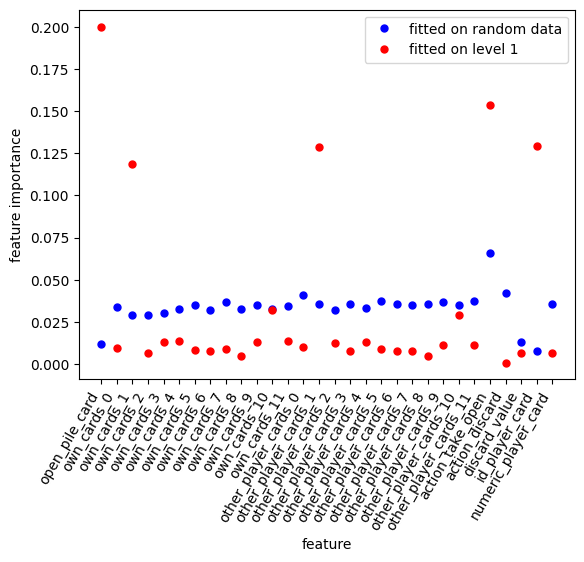

In [38]:
plt.plot(columns[0:30],level1_2players_model.feature_importances_,'o',ms=5,color='blue',label='fitted on random data') 
plt.plot(columns[0:30],level1_2players_modelb.feature_importances_,'o',ms=5,color='red',label='fitted on level 1') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=60, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
print("fitting random data")
for i in range(30):
    if abs(level1_2players_model.feature_importances_[i]-np.median(level1_2players_model.feature_importances_))>0.01:
        print(columns[i]+" has importance "+str(round(level1_2players_model.feature_importances_[i],4)))
 
print("fitting level 1 data")
for i in range(30):
    if abs(level1_2players_modelb.feature_importances_[i]-np.median(level1_2players_modelb.feature_importances_))>0.01:
        print(columns[i]+" has importance "+str(round(level1_2players_modelb.feature_importances_[i],4)))
    

In the first fit which is done on the random data the vast majority features has about the same importance. 
Less importance has the open card, the value of the discarded card and least the id of the choosen card. The only feature with larger importance is the whether the open card is used. 
That seems plausible, most are equally importance, the id is truly less imprortant usually and whether the open card has a lot of importance on the following actions.

In contrast a lot is different for the model fitted to level 1 (which has less depth and fits more correlated data), most have nearlz no importance. Take action stazs important but beides also not so plasuible also 4 player cards (that both player contribute the same can be understood since who is who changes from turn to turn) and the id of used card. That the value of the open is used is plausible, since it matters at least closer to the end of the game. 
Still overall it makes less sense, and thus it is not surprising that implementing it does not lead to improvements. 

fitting level 1 data with features
open_pile_card has importance 0.0178
own_n_closed has importance 0.2736
own_n_open has importance 0.0091
own_sum has importance 0.1182
other_player_n_closed has importance 0.2667
other_player_n_open has importance 0.0131
other_player_sum has importance 0.1163
action_take_open has importance 0.0199
action_discard has importance 0.0141
numeric_player_card has importance 0.0582


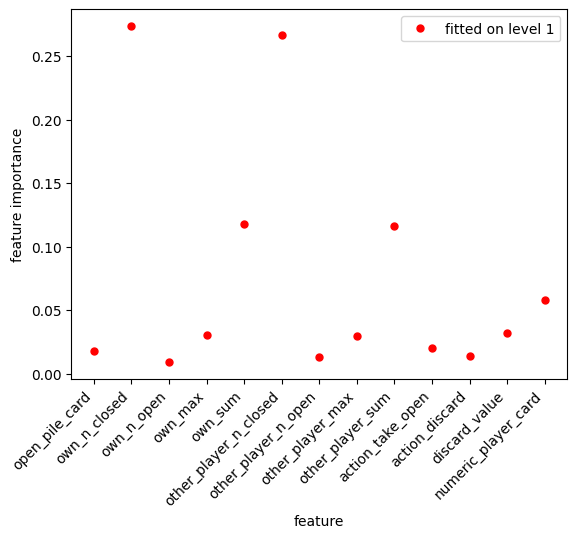

In [39]:
plt.plot(newcolumns[0:13],level1_2players_modelc.feature_importances_,'o',ms=5,color='red',label='fitted on level 1') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=45, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
print("fitting level 1 data with features")
for i in range(13):
    if abs(level1_2players_modelc.feature_importances_[i]-np.median(level1_2players_modelc.feature_importances_))>0.01:
        print(newcolumns[i]+" has importance "+str(round(level1_2players_modelc.feature_importances_[i],4)))
    

Here it looks more plausibel again. Most important are the sum of the card values and how many or open, since the the differential score is approximate: own_sum+own_n_closed*avg_value-(other_player_sum+other_player_n_closed*avg_value)

The next important is the player card given, which is the next important, because it always matters.

That n_open has the smallest importance makes sense since it is just reverse of closed always besides for vanishing cards, and it is not expected that those importance can be discovered here.  

Reason for no improvement could be that the system fits too much the past xgboost model which helps for predicting future
but possible not for winning. Using first level data which is more random in a better moredl could help agaoinst that. 


New Idea

Human imitation. Now predicting which card was used. First for all human actions. Later possible restricting to won games, could add other wins to it.

Both rounds and games are used. 

In [40]:
list_all=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer')) and os.path.isfile(os.path.join(myPath, f))]
#randomness wanted that test train have random subsets of it since splitting is not random 
random.shuffle(list_all)
print(len(list_all))
#used for first on human training were 279 games/stand alone rounds

427


In [41]:
#get all columns for now, add also win worker
#first get number of rows 
cc=0
for i in range(len(list_all)):
    a=np.loadtxt(list_all[i])
    cc+=a.shape[1]
print(cc)  
all_hu_com=np.zeros((55,int(cc)))
#55 is number of data entry
cc=0
for i in range(len(list_all)):
    a=np.loadtxt(list_all[i])    
    #rounds
    if a.shape[0]==51:
        all_hu_com[0:51,cc:cc+a.shape[1]]=a
        #rounds
        all_hu_com[51,cc:cc+a.shape[1]]=0
        #not fats but not big here
        for j in range(a.shape[1]):
            if a[49,j]<a[50,j]:
                all_hu_com[52,cc+j]=1
            else:
                all_hu_com[53,cc+j]=1
    else:            
         all_hu_com[0:54,cc:cc+a.shape[1]]=a   
    all_hu_com[54,cc:cc+a.shape[1]]=i        
    cc+=a.shape[1]     
    

34348


In [42]:
#column names 
columns2=['acting_player']
columns2.append('open_pile_card')
for i in range(15):
    columns2.append('number_of_'+str(i-2)+'_in_open')
columns2.append('number_of_cards_in_closed')
for i in range(12):
    columns2.append('own_cards_'+str(i))
for i in range(12):
    columns2.append('other_player_cards_'+str(i))    
columns2.append('action_take_open')
columns2.append('action_discard')
columns2.append('discard_value')
columns2.append('id_player_card')
columns2.append('numeric_player_card') 
columns2.append('vanish_marker')
columns2.append('turn')
columns2.append('score_self')
columns2.append('score_other')
columns2.append('round_number')
columns2.append('winner_self')
columns2.append('winner_other')
columns2.append('entry_number')
print(len(columns2),columns2)

55 ['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker

In [43]:
df_hum_com = pd.DataFrame(data = all_hu_com.T, index=range(all_hu_com.shape[1]),columns = columns2)
print(df_hum_com.head())

   acting_player  open_pile_card  number_of_-2_in_open  number_of_-1_in_open  \
0            0.0             7.0                   0.0                   0.0   
1            1.0             9.0                   0.0                   0.0   
2            0.0            11.0                   0.0                   0.0   
3            1.0             7.0                   0.0                   0.0   
4            0.0             5.0                   0.0                   0.0   

   number_of_0_in_open  number_of_1_in_open  number_of_2_in_open  \
0                  1.0                  0.0                  1.0   
1                  1.0                  0.0                  1.0   
2                  1.0                  0.0                  1.0   
3                  1.0                  0.0                  1.0   
4                  1.0                  0.0                  1.0   

   number_of_3_in_open  number_of_4_in_open  number_of_5_in_open  ...  \
0                  0.0               

Select human, human who wins and all winners now.

In [44]:
#select human is first player
df_hum=df_hum_com[df_hum_com.acting_player==0]
#human wins
df_hum_win=df_hum_com[(df_hum_com.acting_player==0) & (df_hum_com.winner_self==1)]
#all wins
df_win=df_hum_com[ (df_hum_com.winner_self==1)]
print(df_hum.shape,df_hum_win.shape,df_win.shape)


(16798, 55) (14227, 55) (16903, 55)


Now I get some sumarizing columns for the player cards, since it is clear that for using single card information
there were not enough games. 

In [45]:
#get average value of cards
weight_vec=np.array([5/150,10/150,15/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150,10/150]) 
vals=np.array(range(-2,13))

av_value=np.dot(vals,weight_vec)
#average vale of card
print(f"average value is {av_value}")
df_hum['own_n_closed']=df_hum.loc[:,'own_cards_0':'own_cards_11'][df_hum.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
#now n_open isstead because small n_vanished likely cases pron=blem in deep learning
df_hum['own_n_open']=df_hum.loc[:,'own_cards_0':'own_cards_11'][(df_hum.loc[:,'own_cards_0':'own_cards_11']!=30) & (df_hum.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df_hum['own_sum']=df_hum.loc[:,'own_cards_0':'own_cards_11'][(df_hum.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df_hum['own_max']=df_hum.loc[:,'own_cards_0':'own_cards_11'][(df_hum.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df_hum['other_player_n_closed']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df_hum['other_player_n_open']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)

df_hum['other_player_sum']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)
df_hum['other_player_max']=df_hum.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
#replace placeholder with for closed with avg_value
df_hum['value_player_card']=df_hum['numeric_player_card']
df_hum.value_player_card[df_hum.numeric_player_card==20]=av_value

#now same for human wins
df_hum_win['own_n_closed']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][df_hum_win.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
df_hum_win['own_n_open']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][(df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=30) & (df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df_hum_win['own_sum']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][(df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df_hum_win['own_max']=df_hum_win.loc[:,'own_cards_0':'own_cards_11'][(df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_hum_win.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df_hum_win['other_player_n_closed']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df_hum_win['other_player_n_open']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)

df_hum_win['other_player_sum']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)
df_hum_win['other_player_max']=df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_hum_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df_hum_win['value_player_card']=df_hum_win['numeric_player_card']
df_hum_win.value_player_card[df_hum_win.numeric_player_card==20]=av_value


#now same for wins
df_win['own_n_closed']=df_win.loc[:,'own_cards_0':'own_cards_11'][df_win.loc[:,'own_cards_0':'own_cards_11']==20].count(axis=1)
df_win['own_n_open']=df_win.loc[:,'own_cards_0':'own_cards_11'][(df_win.loc[:,'own_cards_0':'own_cards_11']!=30) & (df_win.loc[:,'own_cards_0':'own_cards_11']!=20)].count(axis=1)
df_win['own_sum']=df_win.loc[:,'own_cards_0':'own_cards_11'][(df_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_win.loc[:,'own_cards_0':'own_cards_11']!=30)].sum(axis=1)
df_win['own_max']=df_win.loc[:,'own_cards_0':'own_cards_11'][(df_win.loc[:,'own_cards_0':'own_cards_11']!=20) & (df_win.loc[:,'own_cards_0':'own_cards_11']!=30)].max(axis=1)
df_win['other_player_n_closed']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][df_win.loc[:,'other_player_cards_0':'other_player_cards_11']==20].count(axis=1)
df_win['other_player_n_open']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].count(axis=1)

df_win['other_player_sum']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].sum(axis=1)
df_win['other_player_max']=df_win.loc[:,'other_player_cards_0':'other_player_cards_11'][(df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=20) & (df_win.loc[:,'other_player_cards_0':'other_player_cards_11']!=30)].max(axis=1)
df_win['value_player_card']=df_win['numeric_player_card']
df_win.value_player_card[df_win.numeric_player_card==20]=av_value

#now selecting no take_open to train on discard action 
df_hum_discard=df_hum[df_hum.action_take_open==0]
df_win_discard=df_win[df_win.action_take_open==0]
df_hum_win_discard=df_hum_win[df_hum_win.action_take_open==0]

#now selecting not closed discrad actions 
df_hum_value=df_hum[df_hum.action_discard==0]
df_win_value=df_win[df_win.action_discard==0]
df_hum_win_value=df_hum_win[df_hum_win.action_discard==0]

average value is 5.066666666666666


Now I am looking on correlations. 

In [46]:
#s1 corr(s2, method='pearson')
corrs=df_hum.corr('pearson')
#now only wins 
corrs_hum_win=df_hum_win.corr('pearson')
corrs_win=df_win.corr('pearson')
#only using discard actions
corrs_discard=df_hum_discard.corr('pearson')
#now only wins 
corrs_hum_win_discard=df_hum_win_discard.corr('pearson')
corrs_win_discard=df_win_discard.corr('pearson')
#only using not needing to take closed actions
corrs_value=df_hum_value.corr('pearson')
#now only wins 
corrs_hum_win_value=df_hum_win_value.corr('pearson')
corrs_win_value=df_win_value.corr('pearson')

open_pile_card
 human  has correlation of -0.7624
 human wins has correlation of -0.7682
 wins has correlation of -0.7675
number_of_10_in_open
 human  has correlation of -0.0777
 human wins has correlation of -0.0706
 wins has correlation of -0.1008
number_of_12_in_open
 human  has correlation of -0.077
 human wins has correlation of -0.0745
 wins has correlation of -0.1012
action_discard
 human  has correlation of -0.4885
 human wins has correlation of -0.4879
 wins has correlation of -0.4545
discard_value
 human  has correlation of 0.961
 human wins has correlation of 0.962
 wins has correlation of 0.9594
numeric_player_card
 human  has correlation of -0.1321
 human wins has correlation of -0.1252
 wins has correlation of -0.103
vanish_marker
 human  has correlation of 0.108
 human wins has correlation of 0.1053
 wins has correlation of 0.1035


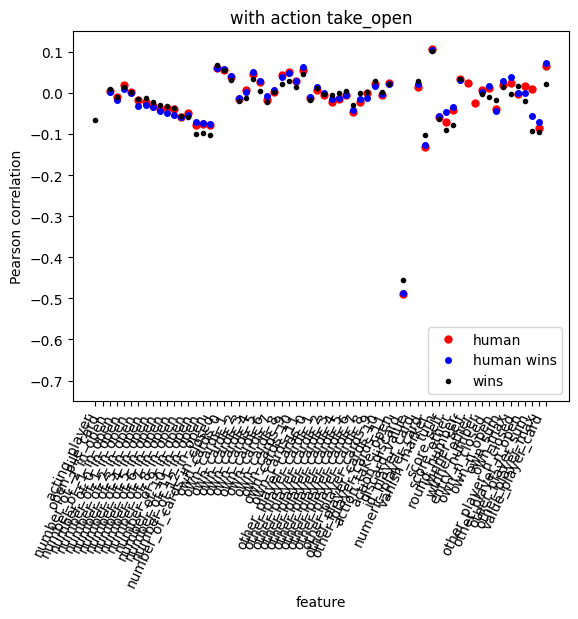

In [47]:
plt.plot(df_hum.columns,corrs.action_take_open,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win.action_take_open,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win.action_take_open,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.75,0.15)
plt.xticks(rotation=65, ha='right')
plt.title("with action take_open")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs.action_take_open[i]<1 and  (abs(corrs.action_take_open[i])>0.10 or abs(corrs_hum_win.action_take_open[i])>0.10 or  abs(corrs_win.action_take_open[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs.action_take_open[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win.action_take_open[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win.action_take_open[i],4)}")     

Some of the action happen only after take_action is decided like discard, x_player_card, score_x thus they should be ignored. Also vanish_marker cannot be just used because it happens only after it. However, the possibility of it could (and likely should be when just one exchange is missing) be predicted.

The strongest correlation is with the open card value as expected. All others are clearly less important, the next important is other_player_max

Now looking on discard action , thewre only cases the open pile card is not uswd are considered.

discard_value
 human  has correlation of 0.7426
 human wins has correlation of 0.7591
 wins has correlation of 0.6727
numeric_player_card
 human  has correlation of 0.5151
 human wins has correlation of 0.4969
 wins has correlation of 0.5379
vanish_marker
 human  has correlation of -0.1353
 human wins has correlation of -0.1396
 wins has correlation of -0.1159
score_self
 human  has correlation of 0.1219
 human wins has correlation of 0.1203
 wins has correlation of 0.0441
own_max
 human  has correlation of -0.1053
 human wins has correlation of -0.1116
 wins has correlation of -0.156
value_player_card
 human  has correlation of -0.2984
 human wins has correlation of -0.2787
 wins has correlation of -0.3039


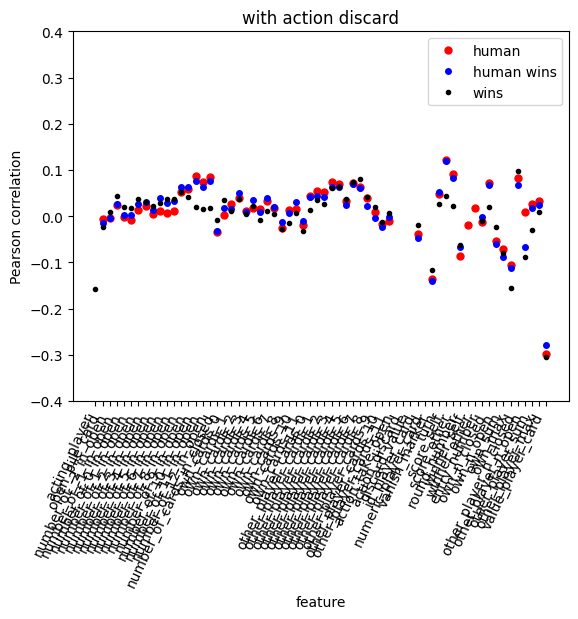

In [48]:
plt.plot(df_hum.columns,corrs_discard.action_discard,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win_discard.action_discard,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win_discard.action_discard,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.4,0.4)
plt.xticks(rotation=65, ha='right')
plt.title("with action discard")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs_discard.action_discard[i]<1 and  (abs(corrs_discard.action_discard[i])>0.10 or abs(corrs_hum_win_discard.action_discard[i])>0.10 or  abs(corrs_win_discard.action_discard[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs_discard.action_discard[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win_discard.action_discard[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win_discard.action_discard[i],4)}")     

The x_player card is happening afterwards in a turn. As expected dicard value has the strongest correlation since it depends from that value which action is the best. 

Below then the corrdlelation with played card ignoring the cases when a closed one needed to be taken. In two variants, first closed card are 20, then they are 5.07 which they are in average. 

open_pile_card
 human  has correlation of 0.112
 human wins has correlation of 0.0788
 wins has correlation of 0.1233
number_of_10_in_open
 human  has correlation of 0.1215
 human wins has correlation of 0.0746
 wins has correlation of 0.1694
number_of_11_in_open
 human  has correlation of 0.1215
 human wins has correlation of 0.0789
 wins has correlation of 0.1621
number_of_12_in_open
 human  has correlation of 0.1202
 human wins has correlation of 0.0743
 wins has correlation of 0.1664
own_cards_2
 human  has correlation of 0.1083
 human wins has correlation of 0.1013
 wins has correlation of 0.1159
own_cards_3
 human  has correlation of 0.0736
 human wins has correlation of 0.0848
 wins has correlation of 0.1047
other_player_cards_0
 human  has correlation of 0.0971
 human wins has correlation of 0.1008
 wins has correlation of 0.091
numeric_player_card
 human  has correlation of -0.1887
 human wins has correlation of -0.1913
 wins has correlation of -0.1472
vanish_marker
 human  ha

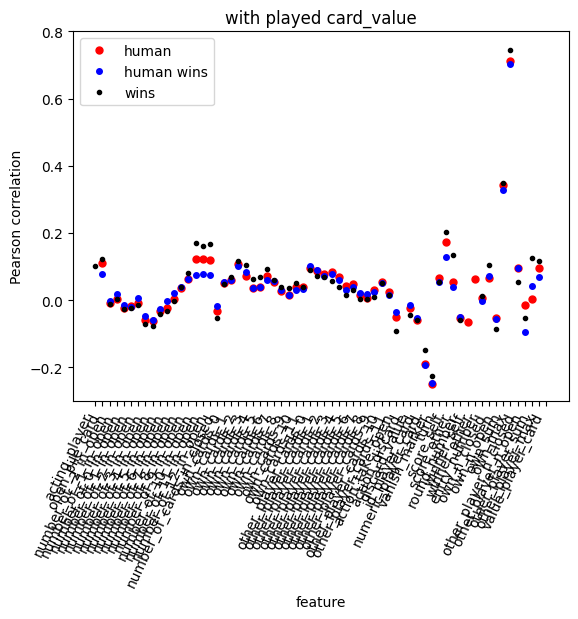

In [49]:
plt.plot(df_hum.columns,corrs_value.value_player_card,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win.columns,corrs_hum_win_value.value_player_card,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win.columns,corrs_win_value.value_player_card,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.3,0.8)
plt.xticks(rotation=65, ha='right')
plt.title("with played card_value")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs_value.value_player_card[i]<1 and  (abs(corrs_value.value_player_card[i])>0.10 or abs(corrs_hum_win_value.value_player_card[i])>0.10 or  abs(corrs_win_value.value_player_card[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs_value.value_player_card[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win_value.value_player_card[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win_value.value_player_card[i],4)}")   

open_pile_card
 human  has correlation of -0.0935
 human wins has correlation of -0.0857
 wins has correlation of -0.1139
number_of_3_in_open
 human  has correlation of -0.1126
 human wins has correlation of -0.1117
 wins has correlation of -0.1136
number_of_4_in_open
 human  has correlation of -0.1072
 human wins has correlation of -0.1032
 wins has correlation of -0.1017
number_of_5_in_open
 human  has correlation of -0.145
 human wins has correlation of -0.1462
 wins has correlation of -0.157
number_of_6_in_open
 human  has correlation of -0.1051
 human wins has correlation of -0.1032
 wins has correlation of -0.1096
number_of_7_in_open
 human  has correlation of -0.1223
 human wins has correlation of -0.1236
 wins has correlation of -0.1294
number_of_8_in_open
 human  has correlation of -0.1717
 human wins has correlation of -0.1627
 wins has correlation of -0.1725
number_of_9_in_open
 human  has correlation of -0.1436
 human wins has correlation of -0.1285
 wins has correlation of

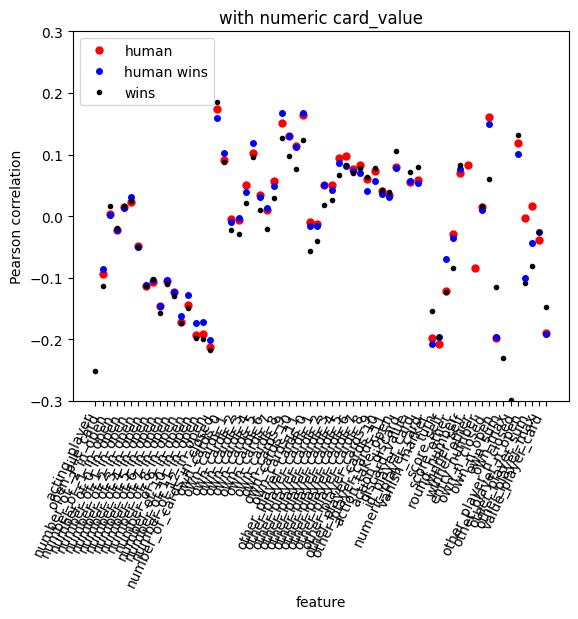

In [50]:
plt.plot(df_hum_value.columns,corrs_value.numeric_player_card,'o',ms=5,color='red',label='human') 
plt.plot(df_hum_win_value.columns,corrs_hum_win_value.numeric_player_card,'o',ms=4,color='blue',label='human wins') 
plt.plot(df_win_value.columns,corrs_win_value.numeric_player_card,'o',ms=3,color='black',label='wins') 
plt.legend(loc="best")
#plt.xscale("log")
plt.ylim(-0.3,0.3)
plt.xticks(rotation=65, ha='right')
plt.title("with numeric card_value")
plt.xlabel("feature")
plt.ylabel("Pearson correlation")
for i in range(1,df_hum.shape[1]):
    if corrs_value.numeric_player_card[i]<1 and  (abs(corrs_value.numeric_player_card[i])>0.10 or abs(corrs_hum_win_value.numeric_player_card[i])>0.10 or  abs(corrs_win_value.numeric_player_card[i])>0.10):
        print(df_hum.columns[i])
        print(f" human  has correlation of {np.round(corrs_value.numeric_player_card[i],4)}")
        print(f" human wins has correlation of {np.round(corrs_hum_win_value.numeric_player_card[i],4)}")
        print(f" wins has correlation of {np.round(corrs_win_value.numeric_player_card[i],4)}")  

Both are similar, likely value is better, since there are at most very small effects when the card is closed when taking it. 

Again the most connectedness ones the action parts before and some not knowable are important, but the player card summarizing
numbers are also more important now, especiually teh maximum value of the own card set. 

Selecting some features which matter more likely for trying xgboost first for take_open.

In [51]:
print(df_hum.columns)
col_sel1=['open_pile_card','own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max','action_take_open','entry_number']
df_hum_sel=df_hum.loc[:,col_sel1]
df_hum_win_sel=df_hum_win.loc[:,col_sel1]
df_win_sel=df_win.loc[:,col_sel1]
#selection for discard
col_sel2=['open_pile_card','own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max','discard_value','action_discard','entry_number']
df_hum_sel_discard=df_hum_discard.loc[:,col_sel2]
df_hum_win_sel_discard=df_hum_win_discard.loc[:,col_sel2]
df_win_sel_discard=df_win_discard.loc[:,col_sel2]
#start next is selecting the ones for card value, include action_open (but not other) because only one of
#discard is possible 
#target is value_card and it is regression since it are points 
col_sel3=['open_pile_card','own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max','action_take_open','discard_value','value_player_card','entry_number']
print(len(col_sel3))
df_hum_sel_value=df_hum_value.loc[:,col_sel3]
df_hum_win_sel_value=df_hum_win_value.loc[:,col_sel3]
df_win_sel_value=df_win_value.loc[:,col_sel3]

Index(['acting_player', 'open_pile_card', 'number_of_-2_in_open',
       'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open',
       'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open',
       'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open',
       'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open',
       'number_of_11_in_open', 'number_of_12_in_open',
       'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1',
       'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5',
       'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9',
       'own_cards_10', 'own_cards_11', 'other_player_cards_0',
       'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3',
       'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6',
       'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9',
       'other_player_cards_10', 'other_player_cards_11', 'action_take_ope

In [52]:
#now splitting
df_hum_train,df_hum_test= train_test_split(df_hum_sel,train_size=0.60, shuffle=True, random_state=1)
df_hum_win_train,df_hum_win_test= train_test_split(df_hum_win_sel,train_size=0.60, shuffle=True, random_state=1)
df_win_train,df_win_test= train_test_split(df_win_sel,train_size=0.60, shuffle=True, random_state=1)
print(df_hum_win_train.shape)
#better splitting of games/round each is only in one sample, they are more similar than random results 
df_win_feature_train2,df_win_feature_test2,df_win_target_train2,df_win_target_test2=split_test(df_win_sel.iloc[:,0:9],df_win_sel.iloc[:,9], df_win_sel.iloc[:,10],0.6)
df_hum_feature_train2,df_hum_feature_test2,df_hum_target_train2,df_hum_target_test2=split_test(df_hum_sel.iloc[:,0:9],df_hum_sel.iloc[:,9], df_hum_sel.iloc[:,10],0.6)
df_hum_win_feature_train2,df_hum_win_feature_test2,df_hum_win_target_train2,df_hum_win_target_test2=split_test(df_hum_win_sel.iloc[:,0:9],df_hum_win_sel.iloc[:,9], df_hum_win_sel.iloc[:,10],0.6)
#now for discard 
df_win_feature_train2_discard,df_win_feature_test2_discard,df_win_target_train2_discard,df_win_target_test2_discard=split_test(df_win_sel_discard.iloc[:,0:10],df_win_sel_discard.iloc[:,10], df_win_sel_discard.iloc[:,11],0.6)
df_hum_feature_train2_discard,df_hum_feature_test2_discard,df_hum_target_train2_discard,df_hum_target_test2_discard=split_test(df_hum_sel_discard.iloc[:,0:10],df_hum_sel_discard.iloc[:,10], df_hum_sel_discard.iloc[:,11],0.6)
df_hum_win_feature_train2_discard,df_hum_win_feature_test2_discard,df_hum_win_target_train2_discard,df_hum_win_target_test2_discard=split_test(df_hum_win_sel_discard.iloc[:,0:10],df_hum_win_sel_discard.iloc[:,10], df_hum_win_sel_discard.iloc[:,11],0.6)
#now for value
df_win_feature_train2_value,df_win_feature_test2_value,df_win_target_train2_value,df_win_target_test2_value=split_test(df_win_sel_value.iloc[:,0:11],df_win_sel_value.iloc[:,11], df_win_sel_value.iloc[:,12],0.6)
df_hum_feature_train2_value,df_hum_feature_test2_value,df_hum_target_train2_value,df_hum_target_test2_value=split_test(df_hum_sel_value.iloc[:,0:11],df_hum_sel_value.iloc[:,11], df_hum_sel_value.iloc[:,12],0.6)
df_hum_win_feature_train2_value,df_hum_win_feature_test2_value,df_hum_win_target_train2_value,df_hum_win_target_test2_value=split_test(df_hum_win_sel_value.iloc[:,0:11],df_hum_win_sel_value.iloc[:,11], df_hum_win_sel_value.iloc[:,12],0.6)
print(df_hum_win_feature_train2_value.head())

(8536, 11)
10142
10148
10079
10087
8536
8575
6493
6496
6366
6398
5350
5353
7416
7431
7153
7185
6098
6122
    open_pile_card  own_n_closed  own_n_open  own_sum  own_max  \
2             11.0             9           3      9.0      7.0   
4              5.0             9           3      8.0      6.0   
6              3.0             9           3      7.0      5.0   
10            10.0             7           5     21.0     11.0   
12            10.0             6           6     32.0     11.0   

    other_player_n_closed  other_player_n_open  other_player_sum  \
2                       9                    3               2.0   
4                       8                    4               5.0   
6                       8                    4               8.0   
10                      7                    5              10.0   
12                      7                    5              -1.0   

    other_player_max  action_take_open  discard_value  
2                3.0             

[[6408   74]
 [  95 3571]]


(<AxesSubplot:title={'center':'train'}>, Text(0.5, 1.0, 'train'))

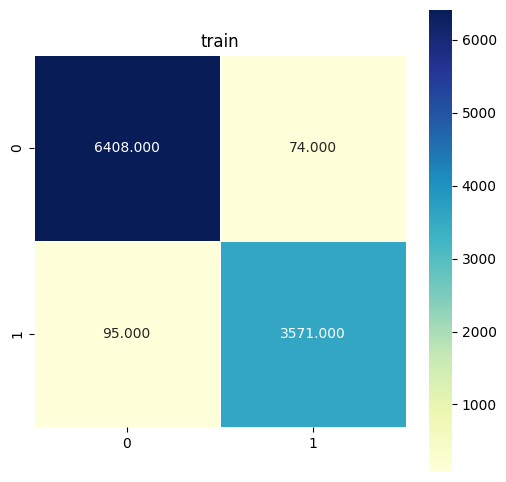

In [53]:
#now using better splitting and win
open1=XGBClassifier().fit(df_win_feature_train2,df_win_target_train2)
pred_te=open1.predict(df_win_feature_test2)
pred_tr=open1.predict(df_win_feature_train2)
conf_train = confusion_matrix(df_win_target_train2, pred_tr)
conf_test = confusion_matrix(df_win_target_test2, pred_te)
print(conf_train)
plt.figure(figsize = (6, 6));
sns.heatmap(conf_train, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("train")

[[4104  236]
 [ 220 2195]]


(<AxesSubplot:title={'center':'test'}>, Text(0.5, 1.0, 'test'))

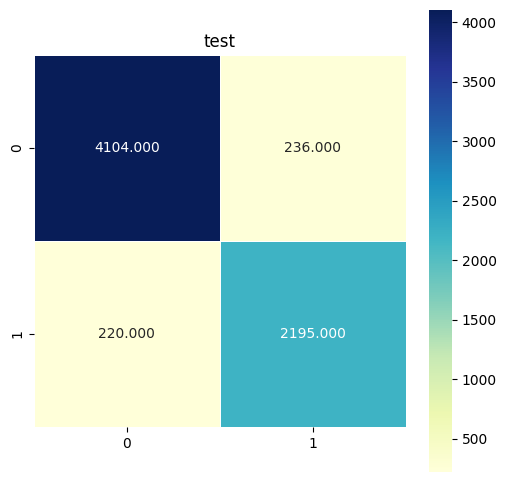

In [54]:
print(conf_test)
plt.figure(figsize = (6, 6));
sns.heatmap(conf_test, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("test")

In [55]:
#return fraction of wrong predicted
def perwrong(conf_matrix):
    return 1-(np.sum(conf_matrix)-conf_matrix[0,1]-conf_matrix[1,0])/np.sum(conf_matrix)

In [56]:
#percentage wrong as measure
train_wrong=perwrong(conf_train)
print(train_wrong)
test_wrong=perwrong(conf_test)
print(test_wrong)

0.016653527788726863
0.06750555144337522


There is some overfitting, but it is relevant improvemnt, but need to look on confusion matrix.

Testing do_xgb_class

In [59]:
ar=do_xgb_class(df_hum_train.iloc[:,0:9],df_hum_train.iloc[:,9],df_hum_test.iloc[:,0:9],df_hum_test.iloc[:,9],max_depth=5,reg=10)
print(ar)

xgb took 0.1391 seconds
percentage wrong test 7.31
percentage wrong train 6.45 
[10.          5.          0.06448413  0.07308908]


In [60]:
#do 1 to 8 always since sample changes often and it is fats enouygh
for i in range(1,9):
    loop_reg(df_hum_train.iloc[:,0:9],df_hum_train.iloc[:,9], df_hum_test.iloc[:,0:9],df_hum_test.iloc[:,9],i,0.1,1.414,20,'take_open_human_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.1554 seconds
percentage wrong test 7.77
percentage wrong train 7.96 
doing case 1
xgb took 0.161 seconds
percentage wrong test 7.77
percentage wrong train 7.99 
doing case 2
xgb took 0.1287 seconds
percentage wrong test 7.77
percentage wrong train 7.97 
doing case 3
xgb took 0.0731 seconds
percentage wrong test 7.77
percentage wrong train 7.97 
doing case 4
xgb took 0.1435 seconds
percentage wrong test 7.79
percentage wrong train 8.0 
doing case 5
xgb took 0.1428 seconds
percentage wrong test 7.83
percentage wrong train 7.99 
doing case 6
xgb took 0.0474 seconds
percentage wrong test 7.76
percentage wrong train 7.99 
doing case 7
xgb took 0.1609 seconds
percentage wrong test 7.74
percentage wrong train 7.99 
doing case 8
xgb took 0.1574 seconds
percentage wrong test 7.74
percentage wrong train 7.99 
doing case 9
xgb took 0.1424 seconds
percentage wrong test 7.85
percentage wrong train 8.11 
doing case 10
xgb took 0.0624 seconds
percentage wrong test 7.87
percent

percentage wrong test 6.71
percentage wrong train 3.26 
doing case 9
xgb took 0.1658 seconds
percentage wrong test 6.62
percentage wrong train 3.52 
doing case 10
xgb took 0.1879 seconds
percentage wrong test 6.81
percentage wrong train 4.24 
doing case 11
xgb took 0.1084 seconds
percentage wrong test 6.83
percentage wrong train 5.05 
doing case 12
xgb took 0.1331 seconds
percentage wrong test 7.01
percentage wrong train 5.67 
doing case 13
xgb took 0.0829 seconds
percentage wrong test 7.36
percentage wrong train 6.21 
doing case 14
xgb took 0.0976 seconds
percentage wrong test 7.42
percentage wrong train 6.47 
doing case 15
xgb took 0.0735 seconds
percentage wrong test 7.53
percentage wrong train 6.98 
doing case 16
xgb took 0.0775 seconds
percentage wrong test 7.44
percentage wrong train 7.24 
doing case 17
xgb took 0.0751 seconds
percentage wrong test 7.74
percentage wrong train 7.7 
doing case 18
xgb took 0.0685 seconds
percentage wrong test 8.15
percentage wrong train 8.07 
doing 

Text(0, 0.5, '% wrong')

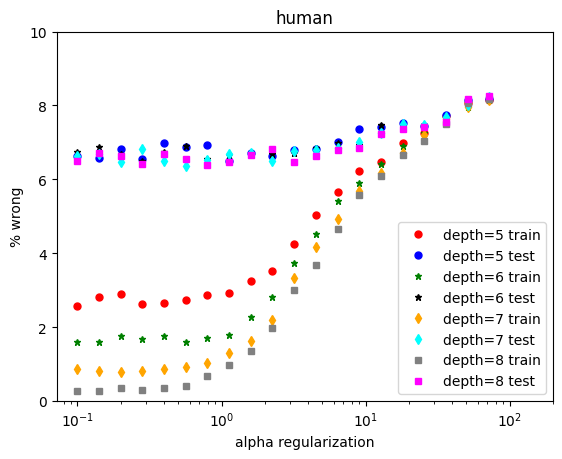

In [61]:
take5=np.loadtxt('take_open_human_xgb_depth5.txt')
take6=np.loadtxt('take_open_human_xgb_depth6.txt')
take7=np.loadtxt('take_open_human_xgb_depth7.txt')
take8=np.loadtxt('take_open_human_xgb_depth8.txt')
plt.plot(take5[0,:],100*take5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(take5[0,:],100*take5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(take6[0,:],100*take6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(take6[0,:],100*take6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(take7[0,:],100*take7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(take7[0,:],100*take7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(take8[0,:],100*take8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(take8[0,:],100*take8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

The differences in test seem to be very small, besides that beyound some regularization it gets worse. Not clear what is bets, should also look into logistic.

Now looking on games being only in training or test or in both.

In [62]:
#now separating test and train by separate games 
for i in range(1,9):
    loop_reg(df_hum_feature_train2,df_hum_target_train2,df_hum_feature_test2,df_hum_target_test2,i,0.1,1.414,30,'take_open_hum2_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.0759 seconds
percentage wrong test 8.05
percentage wrong train 7.8 
doing case 1
xgb took 0.0505 seconds
percentage wrong test 8.05
percentage wrong train 7.79 
doing case 2
xgb took 0.0733 seconds
percentage wrong test 8.08
percentage wrong train 7.82 
doing case 3
xgb took 0.0505 seconds
percentage wrong test 8.05
percentage wrong train 7.87 
doing case 4
xgb took 0.0481 seconds
percentage wrong test 8.07
percentage wrong train 7.8 
doing case 5
xgb took 0.0485 seconds
percentage wrong test 8.1
percentage wrong train 7.82 
doing case 6
xgb took 0.0516 seconds
percentage wrong test 8.1
percentage wrong train 7.79 
doing case 7
xgb took 0.0482 seconds
percentage wrong test 8.12
percentage wrong train 7.78 
doing case 8
xgb took 0.048 seconds
percentage wrong test 8.05
percentage wrong train 7.8 
doing case 9
xgb took 0.0724 seconds
percentage wrong test 8.1
percentage wrong train 7.84 
doing case 10
xgb took 0.0502 seconds
percentage wrong test 8.14
percentage w

xgb took 0.0691 seconds
percentage wrong test 36.2
percentage wrong train 35.36 
doing case 0
xgb took 0.1813 seconds
percentage wrong test 6.83
percentage wrong train 3.87 
doing case 1
xgb took 0.164 seconds
percentage wrong test 6.87
percentage wrong train 3.98 
doing case 2
xgb took 0.1443 seconds
percentage wrong test 6.98
percentage wrong train 4.16 
doing case 3
xgb took 0.1579 seconds
percentage wrong test 6.72
percentage wrong train 3.98 
doing case 4
xgb took 0.1501 seconds
percentage wrong test 7.0
percentage wrong train 4.14 
doing case 5
xgb took 0.1602 seconds
percentage wrong test 6.74
percentage wrong train 3.88 
doing case 6
xgb took 0.1516 seconds
percentage wrong test 6.78
percentage wrong train 4.03 
doing case 7
xgb took 0.1485 seconds
percentage wrong test 6.93
percentage wrong train 4.23 
doing case 8
xgb took 0.1837 seconds
percentage wrong test 6.96
percentage wrong train 4.33 
doing case 9
xgb took 0.1694 seconds
percentage wrong test 6.65
percentage wrong tra

xgb took 0.0637 seconds
percentage wrong test 36.2
percentage wrong train 35.36 
doing case 29
xgb took 0.0573 seconds
percentage wrong test 36.2
percentage wrong train 35.36 
doing case 0
xgb took 0.2803 seconds
percentage wrong test 6.85
percentage wrong train 0.57 
doing case 1
xgb took 0.287 seconds
percentage wrong test 7.02
percentage wrong train 0.61 
doing case 2
xgb took 0.2868 seconds
percentage wrong test 6.98
percentage wrong train 0.54 
doing case 3
xgb took 0.2893 seconds
percentage wrong test 6.96
percentage wrong train 0.42 
doing case 4
xgb took 0.2836 seconds
percentage wrong test 6.83
percentage wrong train 0.42 
doing case 5
xgb took 0.2889 seconds
percentage wrong test 6.95
percentage wrong train 0.59 
doing case 6
xgb took 0.2912 seconds
percentage wrong test 6.76
percentage wrong train 0.8 
doing case 7
xgb took 0.2859 seconds
percentage wrong test 6.81
percentage wrong train 0.93 
doing case 8
xgb took 0.2853 seconds
percentage wrong test 7.06
percentage wrong t

Text(0, 0.5, '% wrong')

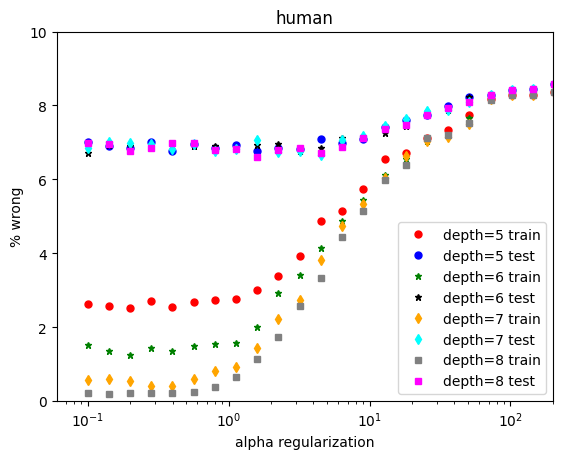

In [63]:
take5b=np.loadtxt('take_open_hum2_xgb_depth5.txt')
take6b=np.loadtxt('take_open_hum2_xgb_depth6.txt')
take7b=np.loadtxt('take_open_hum2_xgb_depth7.txt')
take8b=np.loadtxt('take_open_hum2_xgb_depth8.txt')
plt.plot(take5b[0,:],100*take5b[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(take5b[0,:],100*take5b[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(take6b[0,:],100*take6b[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(take6b[0,:],100*take6b[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(take7b[0,:],100*take7b[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(take7b[0,:],100*take7b[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(take8b[0,:],100*take8b[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(take8b[0,:],100*take8b[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

Some change similar as for win below, still no clear minimum, still less free paramter should be betetr in general but I should add logistic also since that is easier to extrapolate outside the tested area. 


Now looking on winning.

In [64]:
for i in range(1,9):
    loop_reg(df_win_train.iloc[:,0:9],df_win_train.iloc[:,9], df_win_test.iloc[:,0:9],df_win_test.iloc[:,9],i,0.1,1.414,20,'take_open_win_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.07 seconds
percentage wrong test 8.83
percentage wrong train 7.64 
doing case 1
xgb took 0.0587 seconds
percentage wrong test 8.78
percentage wrong train 7.6 
doing case 2
xgb took 0.0624 seconds
percentage wrong test 8.79
percentage wrong train 7.58 
doing case 3
xgb took 0.0554 seconds
percentage wrong test 8.76
percentage wrong train 7.61 
doing case 4
xgb took 0.069 seconds
percentage wrong test 8.78
percentage wrong train 7.71 
doing case 5
xgb took 0.0745 seconds
percentage wrong test 8.83
percentage wrong train 7.63 
doing case 6
xgb took 0.0588 seconds
percentage wrong test 8.85
percentage wrong train 7.65 
doing case 7
xgb took 0.0619 seconds
percentage wrong test 8.85
percentage wrong train 7.7 
doing case 8
xgb took 0.0646 seconds
percentage wrong test 8.79
percentage wrong train 7.8 
doing case 9
xgb took 0.0558 seconds
percentage wrong test 8.78
percentage wrong train 7.74 
doing case 10
xgb took 0.0634 seconds
percentage wrong test 8.78
percentage 

xgb took 0.2005 seconds
percentage wrong test 7.46
percentage wrong train 2.91 
doing case 9
xgb took 0.2014 seconds
percentage wrong test 7.19
percentage wrong train 3.31 
doing case 10
xgb took 0.1662 seconds
percentage wrong test 7.45
percentage wrong train 4.21 
doing case 11
xgb took 0.1457 seconds
percentage wrong test 7.56
percentage wrong train 4.8 
doing case 12
xgb took 0.1178 seconds
percentage wrong test 7.94
percentage wrong train 5.79 
doing case 13
xgb took 0.1127 seconds
percentage wrong test 8.07
percentage wrong train 6.41 
doing case 14
xgb took 0.111 seconds
percentage wrong test 8.24
percentage wrong train 6.79 
doing case 15
xgb took 0.095 seconds
percentage wrong test 8.57
percentage wrong train 7.1 
doing case 16
xgb took 0.1202 seconds
percentage wrong test 9.03
percentage wrong train 7.45 
doing case 17
xgb took 0.0877 seconds
percentage wrong test 9.0
percentage wrong train 7.4 
doing case 18
xgb took 0.0933 seconds
percentage wrong test 9.13
percentage wrong

In [65]:

#now separating test and train by separate games 
for i in range(1,9):
    loop_reg(df_win_feature_train2,df_win_target_train2, df_win_feature_test2,df_win_target_test2,i,0.1,1.414,30,'take_open_win2_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.0714 seconds
percentage wrong test 8.21
percentage wrong train 7.95 
doing case 1
xgb took 0.1108 seconds
percentage wrong test 8.21
percentage wrong train 7.95 
doing case 2
xgb took 0.07 seconds
percentage wrong test 8.25
percentage wrong train 8.04 
doing case 3
xgb took 0.0705 seconds
percentage wrong test 8.21
percentage wrong train 7.98 
doing case 4
xgb took 0.0709 seconds
percentage wrong test 8.26
percentage wrong train 8.03 
doing case 5
xgb took 0.0604 seconds
percentage wrong test 8.28
percentage wrong train 8.04 
doing case 6
xgb took 0.0714 seconds
percentage wrong test 8.26
percentage wrong train 8.02 
doing case 7
xgb took 0.0615 seconds
percentage wrong test 8.3
percentage wrong train 8.05 
doing case 8
xgb took 0.0628 seconds
percentage wrong test 8.32
percentage wrong train 8.04 
doing case 9
xgb took 0.0645 seconds
percentage wrong test 8.38
percentage wrong train 8.04 
doing case 10
xgb took 0.0632 seconds
percentage wrong test 8.34
percenta

xgb took 0.091 seconds
percentage wrong test 34.7
percentage wrong train 34.78 
doing case 29
xgb took 0.0654 seconds
percentage wrong test 34.7
percentage wrong train 34.78 
doing case 0
xgb took 0.2363 seconds
percentage wrong test 7.93
percentage wrong train 4.04 
doing case 1
xgb took 0.2375 seconds
percentage wrong test 7.86
percentage wrong train 3.91 
doing case 2
xgb took 0.2057 seconds
percentage wrong test 7.73
percentage wrong train 3.81 
doing case 3
xgb took 0.281 seconds
percentage wrong test 7.78
percentage wrong train 3.95 
doing case 4
xgb took 0.2189 seconds
percentage wrong test 8.06
percentage wrong train 3.87 
doing case 5
xgb took 0.2204 seconds
percentage wrong test 7.78
percentage wrong train 4.0 
doing case 6
xgb took 0.284 seconds
percentage wrong test 7.82
percentage wrong train 3.9 
doing case 7
xgb took 0.2711 seconds
percentage wrong test 8.02
percentage wrong train 4.06 
doing case 8
xgb took 0.269 seconds
percentage wrong test 7.91
percentage wrong train

percentage wrong test 8.65
percentage wrong train 8.56 
doing case 27
xgb took 0.0839 seconds
percentage wrong test 34.7
percentage wrong train 34.78 
doing case 28
xgb took 0.0655 seconds
percentage wrong test 34.7
percentage wrong train 34.78 
doing case 29
xgb took 0.0955 seconds
percentage wrong test 34.7
percentage wrong train 34.78 
doing case 0
xgb took 0.3993 seconds
percentage wrong test 8.17
percentage wrong train 0.32 
doing case 1
xgb took 0.3311 seconds
percentage wrong test 8.02
percentage wrong train 0.22 
doing case 2
xgb took 0.4322 seconds
percentage wrong test 8.0
percentage wrong train 0.18 
doing case 3
xgb took 0.518 seconds
percentage wrong test 8.28
percentage wrong train 0.27 
doing case 4
xgb took 0.473 seconds
percentage wrong test 7.99
percentage wrong train 0.3 
doing case 5
xgb took 0.5288 seconds
percentage wrong test 7.99
percentage wrong train 0.27 
doing case 6
xgb took 0.4895 seconds
percentage wrong test 8.08
percentage wrong train 0.48 
doing case 7

Clearly different bevahiour, test is worse than before at least for small reguluarization. Is likely too extreme to use it since the samplies in it are not randomly ordered (Different computer strategy and also human strategies change likely). I just scramble them in the list. 

Text(0, 0.5, '% wrong')

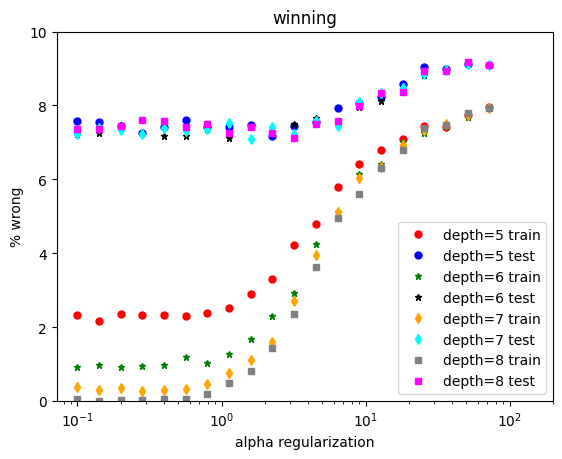

In [66]:
wtake5=np.loadtxt('take_open_win_xgb_depth5.txt')
wtake6=np.loadtxt('take_open_win_xgb_depth6.txt')
wtake7=np.loadtxt('take_open_win_xgb_depth7.txt')
wtake8=np.loadtxt('take_open_win_xgb_depth8.txt')
plt.plot(wtake5[0,:],100*wtake5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(wtake5[0,:],100*wtake5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(wtake6[0,:],100*wtake6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(wtake6[0,:],100*wtake6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(wtake7[0,:],100*wtake7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(wtake7[0,:],100*wtake7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(wtake8[0,:],100*wtake8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(wtake8[0,:],100*wtake8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

Here at least variance seems to get smaller around a regularziation of 2 maybe indicating that this is the best one. 

That was before rerun with slightly larger sample, thus different split, now it looks different again. 

In general it is likely that the sample is too small to be very reliable, also likely the different data sets are likely too much correlated due to sharing states. 

Text(0, 0.5, '% wrong')

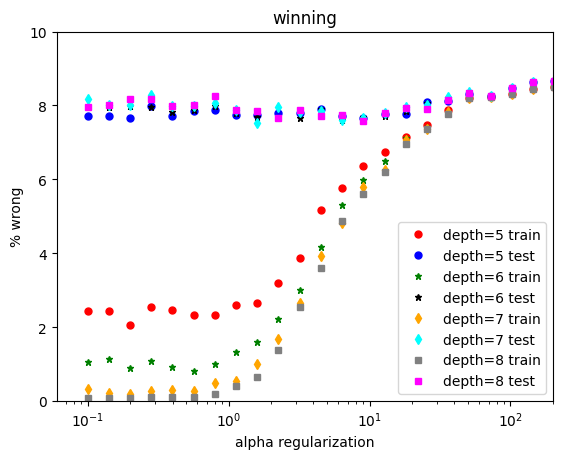

In [67]:
w2take5=np.loadtxt('take_open_win2_xgb_depth5.txt')
w2take6=np.loadtxt('take_open_win2_xgb_depth6.txt')
w2take7=np.loadtxt('take_open_win2_xgb_depth7.txt')
w2take8=np.loadtxt('take_open_win2_xgb_depth8.txt')
plt.plot(w2take5[0,:],100*w2take5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(w2take5[0,:],100*w2take5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(w2take6[0,:],100*w2take6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(w2take6[0,:],100*w2take6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(w2take7[0,:],100*w2take7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(w2take7[0,:],100*w2take7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(w2take8[0,:],100*w2take8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(w2take8[0,:],100*w2take8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

Now bigger differences at least depth 5 looks worse now and also depth 6 needs smaller regularization.

Now with different split it loos even less clear, only really large regulraization is disfavored. 

Since the scatter is partly random, a single dip is likely that and should be ignored. 
There is still no clear minimum. 


Now looking on logistic regression.


[[6057  425]
 [ 504 3162]]


(<AxesSubplot:title={'center':'Logistic train'}>,
 Text(0.5, 1.0, 'Logistic train'))

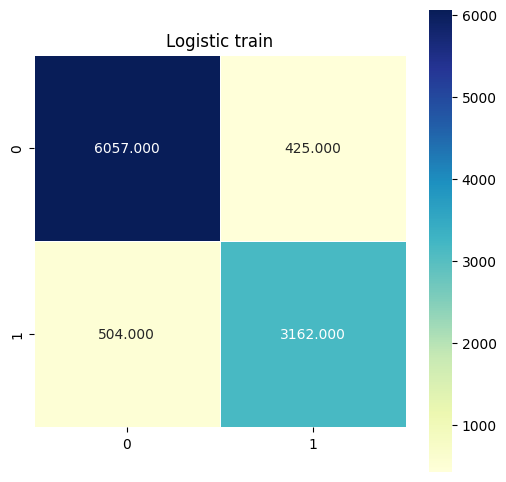

In [57]:
#a few nan remove
df_win_feature_train2[df_win_feature_train2.isnull()]=0
df_win_feature_test2[df_win_feature_test2.isnull()]=0
df_win_target_train2[df_win_target_train2.isnull()]=0
df_win_target_test2[df_win_target_test2.isnull()]=0
lopen1=LogisticRegression().fit(df_win_feature_train2,df_win_target_train2)
lpred_te=lopen1.predict(df_win_feature_test2)
lpred_tr=lopen1.predict(df_win_feature_train2)
lconf_train = confusion_matrix(df_win_target_train2, lpred_tr)
lconf_test = confusion_matrix(df_win_target_test2, lpred_te)
print(lconf_train)
plt.figure(figsize = (6, 6));
sns.heatmap(lconf_train, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("Logistic train")

[[4090  250]
 [ 296 2119]]


(<AxesSubplot:title={'center':'Logistic test'}>,
 Text(0.5, 1.0, 'Logistic test'))

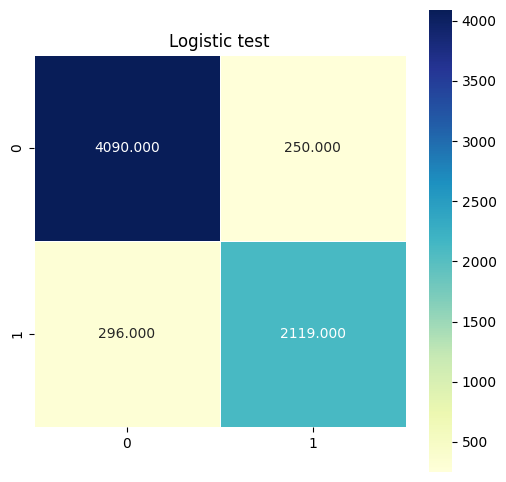

In [58]:

print(lconf_test)
plt.figure(figsize = (6, 6));
sns.heatmap(lconf_test, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"),plt.title("Logistic test")

In [59]:
print("XGBoost standard")
print(f"wrong in train: {round(100*train_wrong,2)} %")
print(f"wrong in test: {round(100*test_wrong,2)} %")
ltest_wrong=perwrong(lconf_test)
ltrain_wrong=perwrong(lconf_train)
print("Logistic standard")
print(f"wrong in train: {round(100*ltrain_wrong,2)} %")
print(f"wrong in test: {round(100*ltest_wrong,2)} %")

XGBoost standard
wrong in train: 1.67 %
wrong in test: 6.75 %
Logistic standard
wrong in train: 9.15 %
wrong in test: 8.08 %


Now adding regularization. 

In [60]:
for i in range(10):
    c=0.0001*10**i
    lopen2=LogisticRegression(penalty='l2',C=c).fit(df_win_feature_train2,df_win_target_train2)
    lpred_te2=lopen2.predict(df_win_feature_test2)
    lpred_tr2=lopen2.predict(df_win_feature_train2)
    lconf_train2 = confusion_matrix(df_win_target_train2, lpred_tr2)
    lconf_test2 = confusion_matrix(df_win_target_test2, lpred_te2)
    ltest_wrong2=perwrong(lconf_test2)
    ltrain_wrong2=perwrong(lconf_train2)
    print(f"Logistic regularized with c={c}")
    print(f"wrong in train: {round(100*ltrain_wrong2,2)} %")
    print(f"wrong in test: {round(100*ltest_wrong2,2)} %")

Logistic regularized with c=0.0001
wrong in train: 10.73 %
wrong in test: 10.14 %
Logistic regularized with c=0.001
wrong in train: 9.31 %
wrong in test: 8.23 %
Logistic regularized with c=0.01
wrong in train: 9.09 %
wrong in test: 7.98 %
Logistic regularized with c=0.1
wrong in train: 9.12 %
wrong in test: 8.07 %
Logistic regularized with c=1.0
wrong in train: 9.15 %
wrong in test: 8.08 %
Logistic regularized with c=10.0
wrong in train: 9.15 %
wrong in test: 8.11 %
Logistic regularized with c=100.0
wrong in train: 9.15 %
wrong in test: 8.11 %
Logistic regularized with c=1000.0
wrong in train: 9.15 %
wrong in test: 8.11 %
Logistic regularized with c=10000.0
wrong in train: 9.15 %
wrong in test: 8.11 %
Logistic regularized with c=100000.0
wrong in train: 9.15 %
wrong in test: 8.11 %


Small variation for larger c, just a small improvement possible in testa nd train which is probably becaus ethe metric is not the same as used by the regression. Is not more followed here, since there does not seem overfitting because less are wrong in test. Logisictic is less good
than xgboost but not by much, thus it is used for now. 

I am now looking on coefficent to be able to implement it myself. 

In [61]:
print(lopen1.coef_,lopen1.intercept_)

[[-1.1564831  -0.09591479 -0.17654283  0.06124354  0.08596344 -0.14850562
  -0.20324485  0.01521082  0.00277937]] [8.30847225]


In [62]:
def logistic_function2(coef,intercept,data):
    res=1/(1+np.exp(-intercept-np.matmul(coef,data)))
    return res

In [64]:
print(df_win_feature_train2.iloc[0,:].shape)
print(logistic_function2(lopen1.coef_,lopen1.intercept_,df_win_feature_train2.iloc[0,:]))
print(df_win_feature_train2.iloc[100,:],df_win_target_train2.iloc[0],lpred_tr[0])
#now loop on many
for i in range(df_win_feature_train2.shape[0]):
    #print(np.matmul(lopen1.coef_,df_win_feature_train2.iloc[i,:]))
    res=logistic_function2(lopen1.coef_,lopen1.intercept_,df_win_feature_train2.iloc[i,:])
    if np.round(res)!=lpred_tr[i]:
        print("problem for")
        print(i,res,lpred_tr[i])

(9,)
[0.12102878]
open_pile_card            9.0
own_n_closed              8.0
own_n_open                4.0
own_sum                  16.0
own_max                   9.0
other_player_n_closed    10.0
other_player_n_open       2.0
other_player_sum          2.0
other_player_max          2.0
Name: 206, dtype: float64 0.0 0.0


Works fine. 

Looking on probabilities of extreme cases and mean for the others. 


In [97]:
for i in range(df_win_feature_train2.shape[1]):
    #print(np.matmul(lopen1.coef_,df_win_feature_train2.iloc[i,:]))
    dat=np.zeros(9)
    for j in range(9):
        dat[j]=df_win_feature_train2.iloc[:,j].mean()
        if j==i:    
            print(f"min of {df_hum_feature_train2.columns[i%9]}")
            dat[j]=df_win_feature_train2.iloc[:,j].min()
    print(dat)    
    res=logistic_function2(lopen1.coef_,lopen1.intercept_,dat)
    print(f"p take open is {np.round(res[0],4)}")    
    for j in range(9):
        dat[j]=df_win_feature_train2.iloc[:,j].mean()
        if j==i:
            print(f"max of {df_hum_feature_train2.columns[i%9]}")
            dat[j]=df_win_feature_train2.iloc[:,j].max()        
    print(dat)    
    res=logistic_function2(lopen1.coef_,lopen1.intercept_,dat)
    print(f"p take open is {np.round(res[0],4)}")
    

min of open_pile_card
[-2.          5.62366969  5.83415451 13.79266851  5.99448167  6.70250296
  5.23216397 12.34489555  6.31710682]
p take open is 0.9998
max of open_pile_card
[12.          5.62366969  5.83415451 13.79266851  5.99448167  6.70250296
  5.23216397 12.34489555  6.31710682]
p take open is 0.0005
min of own_n_closed
[ 6.66210091  1.          5.83415451 13.79266851  5.99448167  6.70250296
  5.23216397 12.34489555  6.31710682]
p take open is 0.2659
max of own_n_closed
[ 6.66210091 10.          5.83415451 13.79266851  5.99448167  6.70250296
  5.23216397 12.34489555  6.31710682]
p take open is 0.1325
min of own_n_open
[ 6.66210091  5.62366969  0.         13.79266851  5.99448167  6.70250296
  5.23216397 12.34489555  6.31710682]
p take open is 0.3944
max of own_n_open
[ 6.66210091  5.62366969 11.         13.79266851  5.99448167  6.70250296
  5.23216397 12.34489555  6.31710682]
p take open is 0.0854
min of own_sum
[ 6.66210091  5.62366969  5.83415451 -8.          5.99448167  6.702

In [70]:
allpar=np.zeros((10))
allpar[0]=lopen1.intercept_
allpar[1:10]=lopen1.coef_
print(allpar)
#check speed
starttime=time.time()
for i in range(df_win_feature_train2.shape[0]):
    #print(np.matmul(lopen1.coef_,df_win_feature_train2.iloc[i,:]))
    res=logistic_function2(allpar[1:10],allpar[0],df_win_feature_train2.iloc[i,:])    
    if i==0:
        print(res)
stoptime=time.time()
print(f"took {round(stoptime-starttime,4)} seconds for {df_win_feature_train2.shape[0]} operations")
#noe not overwritten
#np.savetxt("logis_par_take_open_v1.txt",allpar)

[ 8.30847225e+00 -1.15648310e+00 -9.59147886e-02 -1.76542828e-01
  6.12435354e-02  8.59634374e-02 -1.48505619e-01 -2.03244848e-01
  1.52108157e-02  2.77936897e-03]
0.12102877505714045
took 1.2162 seconds for 10148 operations


In [66]:
#nopw using the file output as input
def logistic_function(coefs,data):
    res=1/(1+np.exp(-coefs[0]-np.matmul(coefs[1:coefs.shape[0]],data)))
    return res

In [69]:
coefs=np.loadtxt("logis_par_take_open_v1.txt")
#testing it 
res=logistic_function(coefs,df_win_feature_train2.iloc[0,:])
print(res)

0.12102877505714045


Speed is o.k. could be fatsre but unlikely will matter compared to the other loops even less since only one application per turn is needed no simulation. 

Text(0, 0.5, 'feature importance')

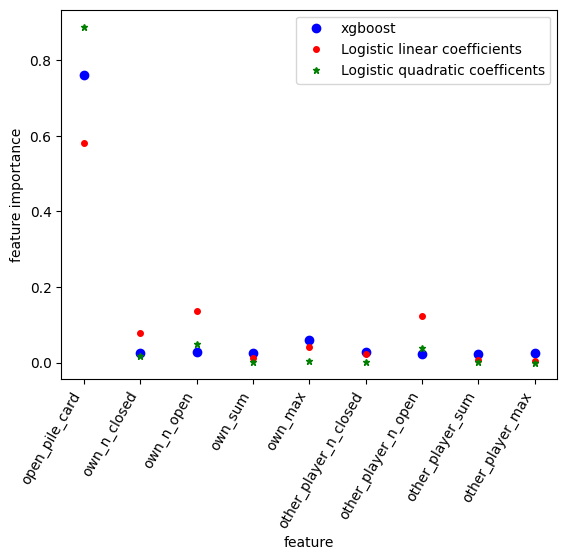

In [139]:

resl=np.zeros((4,9))
for i in range(9):
    resl[0,i]=np.std(df_hum_feature_train2.iloc[:,i])
    resl[1,i]=1/resl[0,i]*lopen1.coef_[0,i]
#relative importance    
resl[2]=abs(resl[1])/sum(abs(resl[1]))    
resl[3]=abs(resl[1]**2)/sum(abs(resl[1]**2)) 
#using coefficents my self sigmoid( dot([val1, val2, 2], lr.coef_.T) )
plt.plot(df_hum_feature_train2.columns,open1.feature_importances_,'o',ms=6,color='blue',label='xgboost') 
plt.plot(df_hum_feature_train2.columns,resl[2],'o',ms=4,color='red',label='Logistic linear coefficients') 
plt.plot(df_hum_feature_train2.columns,resl[3],'*',ms=5,color='green',label='Logistic quadratic coefficents') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=60, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")

As expected open card value is the most important one. That is is similar for logistic and xgboost. 

Logistic is worse than xgboost. The difference is much bigger in train but still clear also in test. Likely some non linearity causes it.
Later feature enegreing will be explored to improve it, but for now I just concentrate on xgboost. 

Now looking on action discard, only cases which are not taken open are considered since the others are trivially 0.

In [72]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_hum_feature_train2_discard,df_hum_target_train2_discard,df_hum_feature_test2_discard,df_hum_target_test2_discard,i,0.1,1.414,30,'discard_hum2_xgb_depth'+str(i)+'.txt',False)

doing max depth of 1
doing case 0
xgb took 0.065 seconds
percentage wrong test 8.8
percentage wrong train 8.31 
doing case 1
xgb took 0.0498 seconds
percentage wrong test 8.71
percentage wrong train 8.31 
doing case 2
xgb took 0.0483 seconds
percentage wrong test 8.86
percentage wrong train 8.29 
doing case 3
xgb took 0.0505 seconds
percentage wrong test 8.83
percentage wrong train 8.19 
doing case 4
xgb took 0.0488 seconds
percentage wrong test 8.83
percentage wrong train 8.25 
doing case 5
xgb took 0.0489 seconds
percentage wrong test 8.83
percentage wrong train 8.27 
doing case 6
xgb took 0.0488 seconds
percentage wrong test 8.86
percentage wrong train 8.31 
doing case 7
xgb took 0.0521 seconds
percentage wrong test 8.77
percentage wrong train 8.33 
doing case 8
xgb took 0.0506 seconds
percentage wrong test 8.86
percentage wrong train 8.42 
doing case 9
xgb took 0.0508 seconds
percentage wrong test 8.83
percentage wrong train 8.4 
doing case 10
xgb took 0.0542 seconds
percentage wro

xgb took 0.0508 seconds
percentage wrong test 48.38
percentage wrong train 45.81 
doing max depth of 4
doing case 0
xgb took 0.1374 seconds
percentage wrong test 6.75
percentage wrong train 2.83 
doing case 1
xgb took 0.1451 seconds
percentage wrong test 6.54
percentage wrong train 2.85 
doing case 2
xgb took 0.1347 seconds
percentage wrong test 6.69
percentage wrong train 2.85 
doing case 3
xgb took 0.1268 seconds
percentage wrong test 6.69
percentage wrong train 2.78 
doing case 4
xgb took 0.1291 seconds
percentage wrong test 6.57
percentage wrong train 2.76 
doing case 5
xgb took 0.1422 seconds
percentage wrong test 6.6
percentage wrong train 2.89 
doing case 6
xgb took 0.1391 seconds
percentage wrong test 6.92
percentage wrong train 2.83 
doing case 7
xgb took 0.1466 seconds
percentage wrong test 6.92
percentage wrong train 2.95 
doing case 8
xgb took 0.1296 seconds
percentage wrong test 6.98
percentage wrong train 3.08 
doing case 9
xgb took 0.1363 seconds
percentage wrong test 6.

xgb took 0.0636 seconds
percentage wrong test 48.38
percentage wrong train 45.81 
doing case 28
xgb took 0.0743 seconds
percentage wrong test 48.38
percentage wrong train 45.81 
doing case 29
xgb took 0.054 seconds
percentage wrong test 48.38
percentage wrong train 45.81 
doing max depth of 7
doing case 0
xgb took 0.2764 seconds
percentage wrong test 6.51
percentage wrong train 0.13 
doing case 1
xgb took 0.2533 seconds
percentage wrong test 6.92
percentage wrong train 0.19 
doing case 2
xgb took 0.2569 seconds
percentage wrong test 6.37
percentage wrong train 0.19 
doing case 3
xgb took 0.2594 seconds
percentage wrong test 6.66
percentage wrong train 0.15 
doing case 4
xgb took 0.3015 seconds
percentage wrong test 6.72
percentage wrong train 0.17 
doing case 5
xgb took 0.2593 seconds
percentage wrong test 6.63
percentage wrong train 0.19 
doing case 6
xgb took 0.2517 seconds
percentage wrong test 6.49
percentage wrong train 0.33 
doing case 7
xgb took 0.2613 seconds
percentage wrong t

Text(0, 0.5, '% wrong')

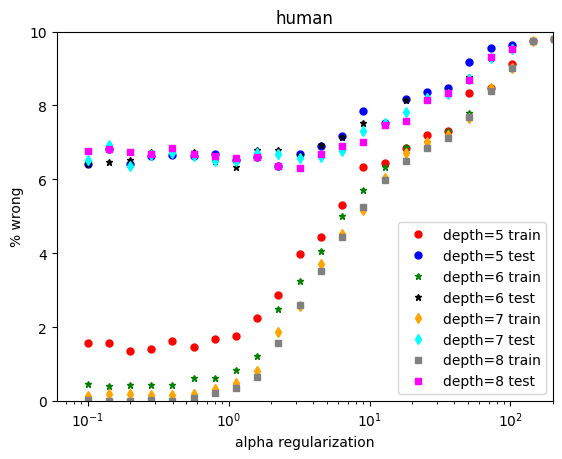

In [78]:
hdis5=np.loadtxt('discard_hum2_xgb_depth5.txt')
hdis6=np.loadtxt('discard_hum2_xgb_depth6.txt')
hdis7=np.loadtxt('discard_hum2_xgb_depth7.txt')
hdis8=np.loadtxt('discard_hum2_xgb_depth8.txt')
plt.plot(hdis5[0,:],100*hdis5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(hdis5[0,:],100*hdis5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(hdis6[0,:],100*hdis6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(hdis6[0,:],100*hdis6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(hdis7[0,:],100*hdis7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(hdis7[0,:],100*hdis7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(hdis8[0,:],100*hdis8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(hdis8[0,:],100*hdis8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,10)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

Similar as before differences are small, likely it is not very important which one is chosen. 

In [79]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_win_feature_train2_discard,df_win_target_train2_discard,df_win_feature_test2_discard,df_win_target_test2_discard,i,0.1,1.414,30,'discard_win2_xgb_depth'+str(i)+'.txt',False)

doing max depth of 1
doing case 0
xgb took 0.1122 seconds
percentage wrong test 12.77
percentage wrong train 9.86 
doing case 1
xgb took 0.04 seconds
percentage wrong test 12.77
percentage wrong train 9.86 
doing case 2
xgb took 0.0543 seconds
percentage wrong test 12.88
percentage wrong train 9.92 
doing case 3
xgb took 0.04 seconds
percentage wrong test 12.83
percentage wrong train 9.95 
doing case 4
xgb took 0.0377 seconds
percentage wrong test 12.83
percentage wrong train 9.93 
doing case 5
xgb took 0.0379 seconds
percentage wrong test 12.83
percentage wrong train 9.93 
doing case 6
xgb took 0.0509 seconds
percentage wrong test 12.83
percentage wrong train 9.9 
doing case 7
xgb took 0.0386 seconds
percentage wrong test 12.94
percentage wrong train 9.84 
doing case 8
xgb took 0.0375 seconds
percentage wrong test 12.94
percentage wrong train 9.86 
doing case 9
xgb took 0.0382 seconds
percentage wrong test 12.68
percentage wrong train 9.9 
doing case 10
xgb took 0.0559 seconds
percent

xgb took 0.0484 seconds
percentage wrong test 43.25
percentage wrong train 41.56 
doing case 29
xgb took 0.041 seconds
percentage wrong test 43.25
percentage wrong train 41.56 
doing max depth of 4
doing case 0
xgb took 0.1471 seconds
percentage wrong test 11.01
percentage wrong train 3.83 
doing case 1
xgb took 0.1183 seconds
percentage wrong test 10.78
percentage wrong train 3.9 
doing case 2
xgb took 0.1188 seconds
percentage wrong test 10.81
percentage wrong train 3.94 
doing case 3
xgb took 0.1206 seconds
percentage wrong test 10.64
percentage wrong train 3.96 
doing case 4
xgb took 0.1298 seconds
percentage wrong test 10.67
percentage wrong train 3.85 
doing case 5
xgb took 0.1209 seconds
percentage wrong test 11.18
percentage wrong train 3.86 
doing case 6
xgb took 0.1242 seconds
percentage wrong test 10.84
percentage wrong train 4.05 
doing case 7
xgb took 0.1274 seconds
percentage wrong test 10.98
percentage wrong train 4.22 
doing case 8
xgb took 0.1384 seconds
percentage wro

xgb took 0.0611 seconds
percentage wrong test 43.25
percentage wrong train 41.56 
doing case 27
xgb took 0.0472 seconds
percentage wrong test 43.25
percentage wrong train 41.56 
doing case 28
xgb took 0.0464 seconds
percentage wrong test 43.25
percentage wrong train 41.56 
doing case 29
xgb took 0.0484 seconds
percentage wrong test 43.25
percentage wrong train 41.56 
doing max depth of 7
doing case 0
xgb took 0.2886 seconds
percentage wrong test 10.95
percentage wrong train 0.04 
doing case 1
xgb took 0.313 seconds
percentage wrong test 10.81
percentage wrong train 0.04 
doing case 2
xgb took 0.2488 seconds
percentage wrong test 11.01
percentage wrong train 0.06 
doing case 3
xgb took 0.2341 seconds
percentage wrong test 10.75
percentage wrong train 0.04 
doing case 4
xgb took 0.2958 seconds
percentage wrong test 11.18
percentage wrong train 0.04 
doing case 5
xgb took 0.2484 seconds
percentage wrong test 11.04
percentage wrong train 0.21 
doing case 6
xgb took 0.2765 seconds
percentag

Text(0, 0.5, '% wrong')

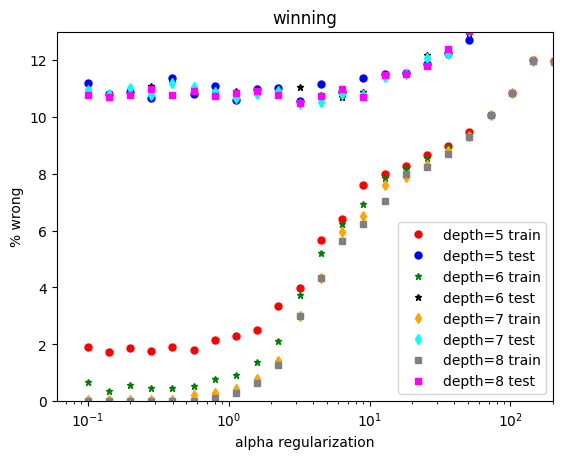

In [80]:
wdis5=np.loadtxt('discard_win2_xgb_depth5.txt')
wdis6=np.loadtxt('discard_win2_xgb_depth6.txt')
wdis7=np.loadtxt('discard_win2_xgb_depth7.txt')
wdis8=np.loadtxt('discard_win2_xgb_depth8.txt')
plt.plot(wdis5[0,:],100*wdis5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(wdis5[0,:],100*wdis5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(wdis6[0,:],100*wdis6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(wdis6[0,:],100*wdis6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(wdis7[0,:],100*wdis7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(wdis7[0,:],100*wdis7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(wdis8[0,:],100*wdis8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(wdis8[0,:],100*wdis8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,200)
plt.ylim(0,13)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

There seems to be a minimum, for depth 8, regularization of 9. 
But changes with random draw

Now looking on logistic regression. 


In [105]:
#a few nan remove
df_win_feature_train2_discard[df_win_feature_train2_discard.isnull()]=0
df_win_feature_test2_discard[df_win_feature_test2_discard.isnull()]=0
df_win_target_train2_discard[df_win_target_train2_discard.isnull()]=0
df_win_target_test2_discard[df_win_target_test2_discard.isnull()]=0
lopen1_dis=LogisticRegression().fit(df_win_feature_train2_discard,df_win_target_train2_discard)
lpred_te_dis=lopen1_dis.predict(df_win_feature_test2_discard)
lpred_tr_dis=lopen1_dis.predict(df_win_feature_train2_discard)
lconf_train_dis = confusion_matrix(df_win_target_train2_discard, lpred_tr_dis)
lconf_test_dis = confusion_matrix(df_win_target_test2_discard, lpred_te_dis)

In [106]:
ltest_wrong_dis=perwrong(lconf_test_dis)
ltrain_wrong_dis=perwrong(lconf_train_dis)
print("Logistic standard")
print(f"wrong in train: {round(100*ltrain_wrong_dis,2)} %")
print(f"wrong in test: {round(100*ltest_wrong_dis,2)} %")

Logistic standard
wrong in train: 13.24 %
wrong in test: 14.08 %


Somewhat worse, but also xgboost is worse for discard. Is probably not full effect, but for now, I just want to get something ready. 

In [77]:
#now checking regularization
for i in range(20):
    c=0.001*2**i
    lopen2=LogisticRegression(penalty='l2',C=c).fit(df_win_feature_train2_discard,df_win_target_train2_discard)
    lpred_te2=lopen2.predict(df_win_feature_test2_discard)
    lpred_tr2=lopen2.predict(df_win_feature_train2_discard)
    lconf_train2 = confusion_matrix(df_win_target_train2_discard, lpred_tr2)
    lconf_test2 = confusion_matrix(df_win_target_test2_discard, lpred_te2)
    ltest_wrong2=perwrong(lconf_test2)
    ltrain_wrong2=perwrong(lconf_train2)
    print(f"Logistic regularized with c={c}")
    print(f"wrong in train: {round(100*ltrain_wrong2,2)} %")
    print(f"wrong in test: {round(100*ltest_wrong2,2)} %")

Logistic regularized with c=0.001
wrong in train: 13.56 %
wrong in test: 14.7 %
Logistic regularized with c=0.002
wrong in train: 13.42 %
wrong in test: 14.54 %
Logistic regularized with c=0.004
wrong in train: 13.25 %
wrong in test: 14.49 %
Logistic regularized with c=0.008
wrong in train: 13.27 %
wrong in test: 14.4 %
Logistic regularized with c=0.016
wrong in train: 13.32 %
wrong in test: 14.29 %
Logistic regularized with c=0.032
wrong in train: 13.25 %
wrong in test: 14.15 %
Logistic regularized with c=0.064
wrong in train: 13.22 %
wrong in test: 14.17 %
Logistic regularized with c=0.128
wrong in train: 13.22 %
wrong in test: 14.15 %
Logistic regularized with c=0.256
wrong in train: 13.22 %
wrong in test: 14.12 %
Logistic regularized with c=0.512
wrong in train: 13.24 %
wrong in test: 14.1 %
Logistic regularized with c=1.024
wrong in train: 13.24 %
wrong in test: 14.08 %
Logistic regularized with c=2.048
wrong in train: 13.24 %
wrong in test: 14.08 %
Logistic regularized with c=4.0

In [ ]:
Exporting the parameters.

In [79]:
allpar=np.zeros((11))
allpar[0]=lopen1_dis.intercept_
allpar[1:12]=lopen1_dis.coef_
print(allpar)
#np.savetxt("logis_par_discard_v1.txt",allpar)

[-5.47165449e+00 -5.63543463e-02 -2.16573153e-02  1.22752991e-01
 -1.46233007e-02 -3.34293441e-01  3.15214089e-01  1.18527579e-01
 -1.65286619e-03  1.25478887e-02  6.83374381e-01]


Looking on the behaviour regarding the behaviour. 

In [108]:

for i in range(df_win_feature_train2_discard.shape[1]):
    dat=np.zeros(10)
    for j in range(10):
        dat[j]=df_win_feature_train2_discard.iloc[:,j].mean()
        if j==i:    
            print(f"min of {df_win_feature_train2_discard.columns[i]}")
            dat[j]=df_win_feature_train2_discard.iloc[:,j].min()
    print(dat)    
    res=logistic_function2(lopen1_dis.coef_,lopen1_dis.intercept_,dat)
    print(f"p discard closed is {np.round(res[0],4)}")    
    for j in range(10):
        dat[j]=df_win_feature_train2_discard.iloc[:,j].mean()
        if j==i:
            print(f"max of {df_win_feature_train2_discard.columns[i]}")
            dat[j]=df_win_feature_train2_discard.iloc[:,j].max()        
    print(dat)    
    res=logistic_function2(lopen1_dis.coef_,lopen1_dis.intercept_,dat)
    print(f"p discard closed is {np.round(res[0],4)}")
    

min of open_pile_card
[-1.          5.63716133  5.87376847 13.716133    5.97860222  6.66825739
  5.2744766  13.14239532  6.56634852  5.76570197]
p discard closed is 0.4286
max of open_pile_card
[12.          5.63716133  5.87376847 13.716133    5.97860222  6.66825739
  5.2744766  13.14239532  6.56634852  5.76570197]
p discard closed is 0.265
min of own_n_closed
[ 8.77078202  1.          5.87376847 13.716133    5.97860222  6.66825739
  5.2744766  13.14239532  6.56634852  5.76570197]
p discard closed is 0.3235
max of own_n_closed
[ 8.77078202 10.          5.87376847 13.716133    5.97860222  6.66825739
  5.2744766  13.14239532  6.56634852  5.76570197]
p discard closed is 0.2824
min of own_n_open
[ 8.77078202  5.63716133  0.         13.716133    5.97860222  6.66825739
  5.2744766  13.14239532  6.56634852  5.76570197]
p discard closed is 0.1737
max of own_n_open
[ 8.77078202  5.63716133 11.         13.716133    5.97860222  6.66825739
  5.2744766  13.14239532  6.56634852  5.76570197]
p discar


Now looking on which card to take, when closed need to be taken that is ignored. 
This is a regression, and closed has the value of 5.07. That means it is similar to 5, that is not true fully but should be the best approximations for small number of cards. 


In [81]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_hum_feature_train2_value,df_hum_target_train2_value,df_hum_feature_test2_value,df_hum_target_test2_value,i,0.1,1.414,30,'value_hum2_xgb_depth'+str(i)+'.txt',True)

doing max depth of 1
doing case 0
xgb took 0.115 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.5012 points
standard deviation of prediction-train 1.5032 points
doing case 1
xgb took 0.0371 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.5013 points
standard deviation of prediction-train 1.5032 points
doing case 2
xgb took 0.0396 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.5011 points
standard deviation of prediction-train 1.5033 points
doing case 3
xgb took 0.0391 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.5011 points
standard deviation of prediction-train 1.5033 points
doing case 4
xgb took 0.041 seconds
standard deviation of test 2.4863 points

xgb took 0.1266 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.4915 points
standard deviation of prediction-train 1.375 points
doing case 8
xgb took 0.1113 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.4898 points
standard deviation of prediction-train 1.3772 points
doing case 9
xgb took 0.1113 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.4908 points
standard deviation of prediction-train 1.377 points
doing case 10
xgb took 0.1489 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.4921 points
standard deviation of prediction-train 1.3809 points
doing case 11
xgb took 0.1132 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4

xgb took 0.1573 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.4856 points
standard deviation of prediction-train 1.3109 points
doing case 16
xgb took 0.0776 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.4825 points
standard deviation of prediction-train 1.3516 points
doing case 17
xgb took 0.064 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.4828 points
standard deviation of prediction-train 1.3739 points
doing case 18
xgb took 0.0755 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.4755 points
standard deviation of prediction-train 1.3983 points
doing case 19
xgb took 0.0619 seconds
standard deviation of test 2.4863 points
standard deviation of train 

xgb took 0.0625 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.534 points
standard deviation of prediction-train 1.5223 points
doing case 24
xgb took 0.0669 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.5518 points
standard deviation of prediction-train 1.5381 points
doing case 25
xgb took 0.0603 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.5759 points
standard deviation of prediction-train 1.5619 points
doing case 26
xgb took 0.069 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.6067 points
standard deviation of prediction-train 1.5948 points
doing case 27
xgb took 0.0671 seconds
standard deviation of test 2.4863 points
standard deviation of train 2

xgb took 0.2353 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.5523 points
standard deviation of prediction-train 0.6514 points
doing case 1
xgb took 0.214 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.5377 points
standard deviation of prediction-train 0.6786 points
doing case 2
xgb took 0.2329 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.5348 points
standard deviation of prediction-train 0.6532 points
doing case 3
xgb took 0.2063 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.5542 points
standard deviation of prediction-train 0.6749 points
doing case 4
xgb took 0.2394 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.43

xgb took 0.306 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.5572 points
standard deviation of prediction-train 0.4772 points
doing case 8
xgb took 0.3013 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.5429 points
standard deviation of prediction-train 0.4743 points
doing case 9
xgb took 0.3041 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.5418 points
standard deviation of prediction-train 0.5105 points
doing case 10
xgb took 0.281 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.5212 points
standard deviation of prediction-train 0.5448 points
doing case 11
xgb took 0.2913 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4

xgb took 0.3217 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.503 points
standard deviation of prediction-train 0.8369 points
doing case 15
xgb took 0.2326 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.5017 points
standard deviation of prediction-train 1.0061 points
doing case 16
xgb took 0.2516 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.4807 points
standard deviation of prediction-train 1.1307 points
doing case 17
xgb took 0.3326 seconds
standard deviation of test 2.4863 points
standard deviation of train 2.4392  points
standard deviation of prediction-test 1.4847 points
standard deviation of prediction-train 1.2194 points
doing case 18
xgb took 0.154 seconds
standard deviation of test 2.4863 points
standard deviation of train 2

Text(0, 0.5, 'standard deviation [points]')

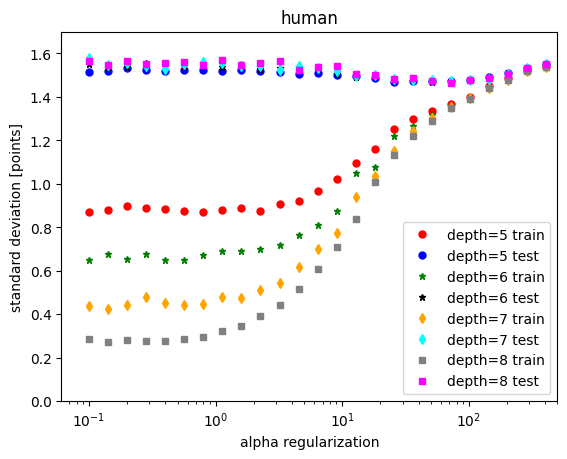

In [82]:
hval5=np.loadtxt('value_hum2_xgb_depth5.txt')
hval6=np.loadtxt('value_hum2_xgb_depth6.txt')
hval7=np.loadtxt('value_hum2_xgb_depth7.txt')
hval8=np.loadtxt('value_hum2_xgb_depth8.txt')
plt.plot(hval5[0,:],hval5[2,:],'o',ms=5,color='red',label='depth=5 train') 
plt.plot(hval5[0,:],hval5[3,:],'o',ms=5,color='blue',label='depth=5 test') 
plt.plot(hval6[0,:],hval6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(hval6[0,:],hval6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(hval7[0,:],hval7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(hval7[0,:],hval7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(hval8[0,:],hval8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(hval8[0,:],hval8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,500)
plt.ylim(0,1.7)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("standard deviation [points]")

Minimum is clearer here. Is understandable that rgression is easier than continuous nature means that for same row number there is more information.

Now winnning case. 

In [83]:
for i in range(1,9):
    print(f"doing max depth of {i}")
    loop_reg(df_win_feature_train2_value,df_win_target_train2_value,df_win_feature_test2_value,df_win_target_test2_value,i,0.1,1.414,30,'value_win2_xgb_depth'+str(i)+'.txt',True)

doing max depth of 1
doing case 0
xgb took 0.1194 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.4944 points
standard deviation of prediction-train 1.4225 points
doing case 1
xgb took 0.0375 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.4959 points
standard deviation of prediction-train 1.4226 points
doing case 2
xgb took 0.0577 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.4947 points
standard deviation of prediction-train 1.4226 points
doing case 3
xgb took 0.0401 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.4946 points
standard deviation of prediction-train 1.4226 points
doing case 4
xgb took 0.0391 seconds
standard deviation of test 2.5523 poin

standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.4897 points
standard deviation of prediction-train 1.316 points
doing case 8
xgb took 0.0635 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.4888 points
standard deviation of prediction-train 1.3135 points
doing case 9
xgb took 0.0567 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.4901 points
standard deviation of prediction-train 1.319 points
doing case 10
xgb took 0.0706 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.4821 points
standard deviation of prediction-train 1.3159 points
doing case 11
xgb took 0.0575 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard dev

xgb took 0.118 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.472 points
standard deviation of prediction-train 1.2636 points
doing case 16
xgb took 0.0732 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.4669 points
standard deviation of prediction-train 1.293 points
doing case 17
xgb took 0.0667 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.4615 points
standard deviation of prediction-train 1.3097 points
doing case 18
xgb took 0.0705 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.4702 points
standard deviation of prediction-train 1.3448 points
doing case 19
xgb took 0.0547 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.

xgb took 0.0788 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.5 points
standard deviation of prediction-train 1.4138 points
doing case 23
xgb took 0.0872 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.5157 points
standard deviation of prediction-train 1.4331 points
doing case 24
xgb took 0.0548 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.5231 points
standard deviation of prediction-train 1.4475 points
doing case 25
xgb took 0.067 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.5359 points
standard deviation of prediction-train 1.4667 points
doing case 26
xgb took 0.0523 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5

doing max depth of 6
doing case 0
xgb took 0.1906 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.5583 points
standard deviation of prediction-train 0.6214 points
doing case 1
xgb took 0.1945 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.5738 points
standard deviation of prediction-train 0.6229 points
doing case 2
xgb took 0.3449 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.5818 points
standard deviation of prediction-train 0.6285 points
doing case 3
xgb took 0.1928 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.5696 points
standard deviation of prediction-train 0.6089 points
doing case 4
xgb took 0.1855 seconds
standard deviation of test 2.5523 poin

xgb took 0.2665 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.5711 points
standard deviation of prediction-train 0.3826 points
doing case 7
xgb took 0.2432 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.5765 points
standard deviation of prediction-train 0.4087 points
doing case 8
xgb took 0.2681 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.5805 points
standard deviation of prediction-train 0.4494 points
doing case 9
xgb took 0.2485 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.5551 points
standard deviation of prediction-train 0.4701 points
doing case 10
xgb took 0.2604 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.

xgb took 0.312 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.5398 points
standard deviation of prediction-train 0.6703 points
doing case 14
xgb took 0.2931 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.5218 points
standard deviation of prediction-train 0.798 points
doing case 15
xgb took 0.1952 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.4904 points
standard deviation of prediction-train 0.972 points
doing case 16
xgb took 0.151 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.5338  points
standard deviation of prediction-test 1.4832 points
standard deviation of prediction-train 1.1034 points
doing case 17
xgb took 0.164 seconds
standard deviation of test 2.5523 points
standard deviation of train 2.53

Text(0, 0.5, 'standard deviation [points]')

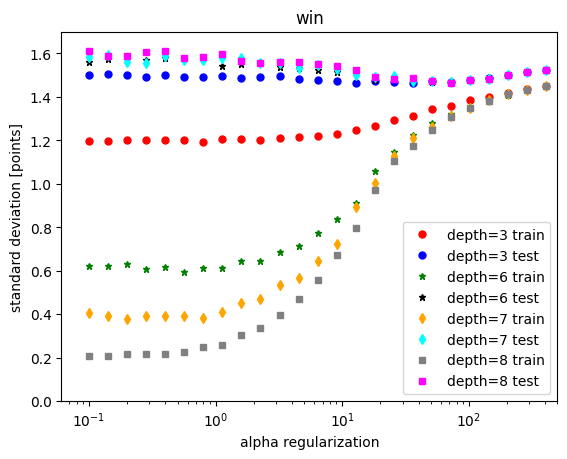

In [131]:
wval3=np.loadtxt('value_win2_xgb_depth3.txt')
#now 3 has the smallest minimum
wval6=np.loadtxt('value_win2_xgb_depth6.txt')
wval7=np.loadtxt('value_win2_xgb_depth7.txt')
wval8=np.loadtxt('value_win2_xgb_depth8.txt')
plt.plot(wval3[0,:],wval3[2,:],'o',ms=5,color='red',label='depth=3 train') 
plt.plot(wval3[0,:],wval3[3,:],'o',ms=5,color='blue',label='depth=3 test') 
plt.plot(wval6[0,:],wval6[2,:],'*',ms=5,color='green',label='depth=6 train') 
plt.plot(wval6[0,:],wval6[3,:],'*',ms=5,color='black',label='depth=6 test') 
plt.plot(wval7[0,:],wval7[2,:],'d',ms=5,color='orange',label='depth=7 train') 
plt.plot(wval7[0,:],wval7[3,:],'d',ms=5,color='cyan',label='depth=7 test') 
plt.plot(wval8[0,:],wval8[2,:],'s',ms=5,color='gray',label='depth=8 train') 
plt.plot(wval8[0,:],wval8[3,:],'s',ms=5,color='magenta',label='depth=8 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,500)
plt.ylim(0,1.7)
plt.xlabel("alpha regularization")
plt.title("win")
plt.ylabel("standard deviation [points]")

In [ ]:
Now linear regression on the same data. 

In [84]:
#a few nan remove
df_win_feature_train2_value[df_win_feature_train2_value.isnull()]=0
df_win_feature_test2_value[df_win_feature_test2_value.isnull()]=0
df_win_target_train2_value[df_win_target_train2_value.isnull()]=0
df_win_target_test2_value[df_win_target_test2_value.isnull()]=0
lopen1_val=LinearRegression().fit(df_win_feature_train2_value,df_win_target_train2_value)
lpred_te_val=lopen1_val.predict(df_win_feature_test2_value)
lpred_tr_val=lopen1_val.predict(df_win_feature_train2_value)
print(f"train standard deviation data {np.std(df_win_target_train2_value)}")
print(f"test standard deviation data {np.std(df_win_target_test2_value)}")
print(f"train standard deviation {np.std(lpred_tr_val-df_win_target_train2_value)}")
print(f"test standard deviation {np.std(lpred_te_val-df_win_target_test2_value)}")

train standard deviation data 2.472126781999639
test standard deviation data 2.5057353349376843
train standard deviation 1.587594048515046
test standard deviation 1.5767196940580885


In [ ]:
Somewhat less improvement than xgbbost, but looks good enough. Is now exported. 

In [86]:
def linear_function(coefs,data):
    res=coefs[0]+np.matmul(coefs[1:coefs.shape[0]],data)
    return res

In [89]:
allpar=np.zeros((10))
allpar[0]=lopen1_val.intercept_
allpar[1:10]=lopen1.coef_
print(allpar)
#write protect 
#np.savetxt("linear_par_value_v1.txt",allpar)

[ 2.13616358 -1.1564831  -0.09591479 -0.17654283  0.06124354  0.08596344
 -0.14850562 -0.20324485  0.01521082  0.00277937]


Now I determine the best option and let it run again and save it then.

I define a function for it. 
As visisble in the plots above, there is no clear minimum in case of the classification cases but many choices get a similar floor value. The actual minum is likely dependent on the eaxct test sample and thus not necessary reliable. To chose a more relaible, the following procedure is used. Quantile in the test sample are calcauted from 5% onwards in steps of 10%. For that only max depth 5 and larger is used because the minium is always is those for classification. 
This qunatiles are then used to define the allowed values of the test metric, it is always the one of 15%, it is enlarged, when the quantile slope is getting lower still outside of it. 
That define the maximum alloed metric value, it is then used the larged regularization with the smallest possible max depth. 

In [135]:
#find (and run) best xgbosst (regression and classification) of a collection
#parameters are list of the files with the metric and parameters, train_features, train_targtes, whether regression (default) or classification
def find_best(list_inputs,feature_train,target_train,output_file_name,regression=True):
    a=np.loadtxt(list_inputs[0])
    all_metrics=np.zeros((5,len(list_inputs),a.shape[1]))

    for i in range(len(list_inputs)):
        a=np.loadtxt(list_inputs[i])
        all_metrics[0:4,i,:]=a
    #first just using minimum in data
    s1=np.unravel_index(np.argmin(all_metrics[3,:,:]),all_metrics[3,:,:].shape)
    s2=np.argsort(all_metrics[3,:,:],axis=None)
    #small input use minium as do regression 
    if regression==True or len(list_inputs)<3:
        #to the minium seems fine for regression 
        if regression==True:
            print(f"minimum of {round(all_metrics[3,s1[0],s1[1]],2)} points is at alpha={round(all_metrics[0,s1[0],s1[1]],2)} and max_depth={int(all_metrics[1,s1[0],s1[1]])}")
            reg4=XGBRegressor(max_depth=int(all_metrics[1,s1[0],s1[1]]),reg_alpha=all_metrics[0,s1[0],s1[1]]).fit(feature_train, target_train)
            #and save it
            reg4.save_model(output_file_name)
            #classification
        else:  
            print(f"minimum of {round(100*all_metrics[3,s1[0],s1[1]],2)} % is at alpha={round(all_metrics[0,s1[0],s1[1]],2)} and max_depth={int(all_metrics[1,s1[0],s1[1]])}")
            reg4=XGBClassifier(max_depth=int(all_metrics[1,s1[0],s1[1]]),reg_alpha=all_metrics[0,s1[0],s1[1]]).fit(feature_train, target_train)
            #and save it
            reg4.save_model(output_file_name) 
    else:
        #for classification the minimum seems not good defined
        #but many choices get a similar floor value. The actual minum is likely dependent on the eaxct test sample and thus not necessary reliable. To chose a more relaible, the following procedure is used. Quantile in the test sample are calcauted from 5% onwards in steps of 10%. For that only max depth 5 and larger is used because the minium is always is those for classification. 
        #This quantiles are then used to define the allowed values of the test metric, it is always the one of 15%, it is enlarged, when the quantile slope is getting lower still outside of it. 
        #That define the maximum allowed metric value
        r=np.quantile(all_metrics[3,4:8,:],[0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
        print("quantiles of larger max depth half")
        print(r)
        #use them until they get larger again but at least the first 15%
        max_wrong=r[1]
        c=0
        while r[c+2]-r[c+1] <=(r[c+1]-r[0])/(1+c):
            max_wrong=r[c+2]
            c+=1
        print(f"accepted percentage  is {round(100*max_wrong,2)}")  
        #get maximum alpha within this limit, by increasing in alpha in loop start value is mimumum
        #loop goes the other way in max_depth to have this as small as possible
        value=[all_metrics[1,s1[0],s1[1]],all_metrics[0,s1[0],s1[1]]]
        per=all_metrics[3,s1[0],s1[1]]
        for j in range(all_metrics.shape[2]): 
            for i in range(all_metrics.shape[1]):
                if all_metrics[3,7-i,j]<=max_wrong:
                    value[0]=all_metrics[1,7-i,j]
                    value[1]=all_metrics[0,7-i,j] 
                    per=all_metrics[3,7-i,j] 
        print(f"minimum of {round(100*all_metrics[3,s1[0],s1[1]],2)} % is at alpha={round(all_metrics[0,s1[0],s1[1]],2)} and max_depth={int(all_metrics[1,s1[0],s1[1]])}")
        print(f"used of {round(100*per,2)} % is at alpha={round(value[1],2)} and max_depth={int(value[0])}")        
        reg4=XGBClassifier(max_depth=int(value[0]),reg_alpha=value[1]).fit(feature_train, target_train)
        #and save it
        reg4.save_model(output_file_name)        

Now running it for all the options of three targets and two different samples each. 

In [268]:
list_val_hum=['value_hum2_xgb_depth1.txt','value_hum2_xgb_depth2.txt','value_hum2_xgb_depth3.txt','value_hum2_xgb_depth4.txt','value_hum2_xgb_depth5.txt','value_hum2_xgb_depth6.txt','value_hum2_xgb_depth7.txt','value_hum2_xgb_depth8.txt']
#now not executed again to use this models for some runs to have enough samples 
#find_best(list_val_hum,df_hum_feature_train2_value,df_hum_target_train2_value,'xgb_value_hum1.json')

minimum of 1.54 points is at alpha=18.06 and max_depth=4


In [269]:
list_val_win=['value_win2_xgb_depth1.txt','value_win2_xgb_depth2.txt','value_win2_xgb_depth3.txt','value_win2_xgb_depth4.txt','value_win2_xgb_depth5.txt','value_win2_xgb_depth6.txt','value_win2_xgb_depth7.txt','value_win2_xgb_depth8.txt']
#find_best(list_val_win,df_win_feature_train2_value,df_win_target_train2_value,'xgb_value_win1.json')

minimum of 1.49 points is at alpha=51.06 and max_depth=5


In [270]:
list_op_hum=['take_open_hum2_xgb_depth1.txt','take_open_hum2_xgb_depth2.txt','take_open_hum2_xgb_depth3.txt','take_open_hum2_xgb_depth4.txt','take_open_hum2_xgb_depth5.txt','take_open_hum2_xgb_depth6.txt','take_open_hum2_xgb_depth7.txt','take_open_hum2_xgb_depth8.txt']
#find_best(list_op_hum,df_hum_feature_train2,df_hum_target_train2,'xgb_open_hum1.json',regression=False)

quantiles of larger max depth half
[0.07276819 0.07426857 0.07576894 0.07776944 0.08732183 0.09211053
 0.10727682 0.10777694 0.11052763 0.32733183]
accepted percentage  is 7.58
minimum of 6.95 % is at alpha=0.28 and max_depth=5
used of 7.5 % is at alpha=4.52 and max_depth=7


In [271]:
list_op_win=['take_open_win2_xgb_depth1.txt','take_open_win2_xgb_depth2.txt','take_open_win2_xgb_depth3.txt','take_open_win2_xgb_depth4.txt','take_open_win2_xgb_depth5.txt','take_open_win2_xgb_depth6.txt','take_open_win2_xgb_depth7.txt','take_open_win2_xgb_depth8.txt']
#find_best(list_op_win,df_win_feature_train2,df_win_target_train2,'xgb_open_win1.json',regression=False)

quantiles of larger max depth half
[0.07920299 0.08069738 0.08219178 0.08418431 0.08719801 0.09310087
 0.09937733 0.0996264  0.1003736  0.31880448]
accepted percentage  is 8.22
minimum of 7.52 % is at alpha=3.2 and max_depth=5
used of 7.97 % is at alpha=9.03 and max_depth=8


In [272]:
list_dis_hum=['discard_hum2_xgb_depth1.txt','discard_hum2_xgb_depth2.txt','discard_hum2_xgb_depth3.txt','discard_hum2_xgb_depth4.txt','discard_hum2_xgb_depth5.txt','discard_hum2_xgb_depth6.txt','discard_hum2_xgb_depth7.txt','discard_hum2_xgb_depth8.txt']
#find_best(list_dis_hum,df_hum_feature_train2_discard,df_hum_target_train2_discard,'xgb_discard_hum1.json',regression=False)

quantiles of larger max depth half
[0.07081763 0.07341748 0.07526375 0.07673323 0.08104748 0.09042954
 0.09984928 0.11152977 0.12207988 0.50263753]
accepted percentage  is 7.67
minimum of 6.59 % is at alpha=4.52 and max_depth=8
used of 7.65 % is at alpha=6.39 and max_depth=4


In [273]:
list_dis_win=['discard_win2_xgb_depth1.txt','discard_win2_xgb_depth2.txt','discard_win2_xgb_depth3.txt','discard_win2_xgb_depth4.txt','discard_win2_xgb_depth5.txt','discard_win2_xgb_depth6.txt','discard_win2_xgb_depth7.txt','discard_win2_xgb_depth8.txt']
#find_best(list_dis_win,df_win_feature_train2_discard,df_win_target_train2_discard,'xgb_discard_win1.json',regression=False)

quantiles of larger max depth half
[0.1064695  0.10900185 0.11007394 0.11127542 0.11312384 0.11661738
 0.13778189 0.15637708 0.16451017 0.43992606]
accepted percentage  is 11.13
minimum of 10.43 % is at alpha=0.28 and max_depth=7
used of 11.09 % is at alpha=12.77 and max_depth=6


Now the used values seem reasonable are not so likely overfit. 

However, the preformance in the game is not so good. Thus, I now reduce the number of features.
Fitrst I get the feature importance to decide which to exclude.

feature open_pile_card
human 0.824 win 0.871
feature own_n_closed
human 0.011 win 0.01
feature own_n_open
human 0.025 win 0.011
feature own_sum
human 0.018 win 0.015
feature own_max
human 0.064 win 0.047
feature other_player_n_closed
human 0.015 win 0.015
feature other_player_n_open
human 0.012 win 0.011
feature other_player_sum
human 0.013 win 0.009
feature other_player_max
human 0.013 win 0.008


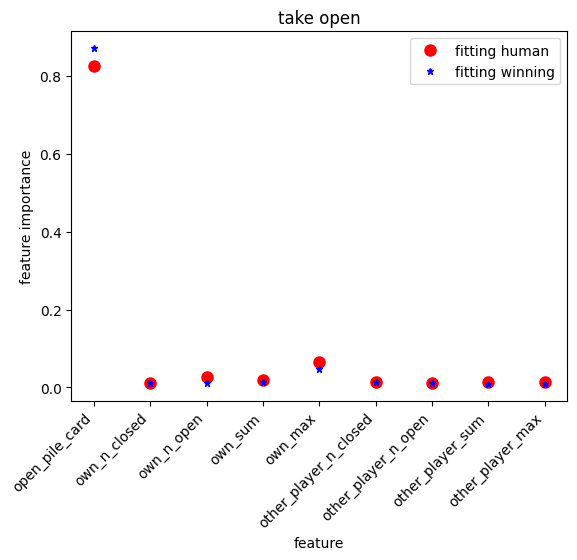

In [93]:

level9_2players_model_open = XGBClassifier()
level9_2players_model_open.load_model("xgb_open_hum1.json")

level9_2players_model_discard = XGBClassifier()
level9_2players_model_discard.load_model("xgb_discard_hum1.json")

level11_2players_model_open = XGBClassifier()
level11_2players_model_open.load_model("xgb_open_win1.json")

level11_2players_model_discard = XGBClassifier()
level11_2players_model_discard.load_model("xgb_discard_win1.json")

plt.plot(df_hum_feature_train2.columns,level9_2players_model_open.feature_importances_,'o',ms=8,color='red',label='fitting human') 
plt.plot(df_win_feature_train2.columns,level11_2players_model_open.feature_importances_,'*',ms=5,color='blue',label='fitting winning') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=45, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
plt.title("take open")
for i in range(len(df_hum_feature_train2.columns)):
    print(f"feature {df_hum_feature_train2.columns[i]}")
    print(f"human {int(level9_2players_model_open.feature_importances_[i]*1000)/1000} win {int(level11_2players_model_open.feature_importances_[i]*1000)/1000}")

Only card on face open pile and maximum of own cards seem to matter, all others clearly less, thus only those two are used now. 

feature open_pile_card
human 0.028 win 0.02
feature own_n_closed
human 0.089 win 0.03
feature own_n_open
human 0.015 win 0.014
feature own_sum
human 0.027 win 0.012
feature own_max
human 0.16 win 0.197
feature other_player_n_closed
human 0.015 win 0.029
feature other_player_n_open
human 0.044 win 0.007
feature other_player_sum
human 0.016 win 0.019
feature other_player_max
human 0.01 win 0.009
feature discard_value
human 0.59 win 0.657


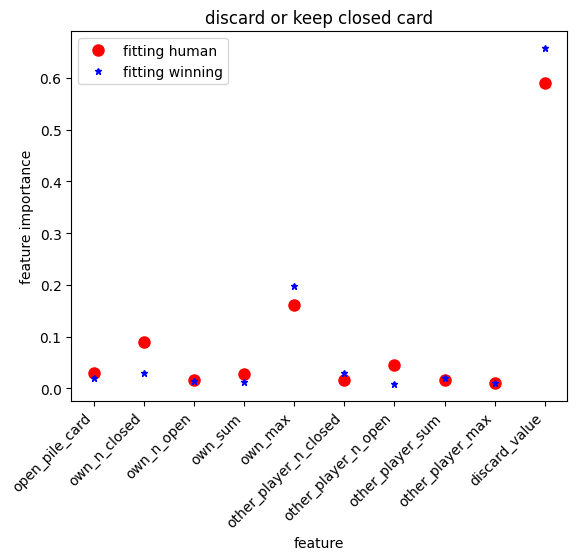

In [95]:

plt.plot(df_hum_feature_train2_discard.columns,level9_2players_model_discard.feature_importances_,'o',ms=8,color='red',label='fitting human') 
plt.plot(df_win_feature_train2_discard.columns,level11_2players_model_discard.feature_importances_,'*',ms=5,color='blue',label='fitting winning') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(55,65)
plt.xticks(rotation=45, ha='right')
plt.xlabel("feature")
plt.ylabel("feature importance")
plt.title("discard or keep closed card")
for i in range(len(df_hum_feature_train2_discard.columns)):
    print(f"feature {df_hum_feature_train2_discard.columns[i]}")
    print(f"human {int(level9_2players_model_discard.feature_importances_[i]*1000)/1000} win {int(level11_2players_model_discard.feature_importances_[i]*1000)/1000}")

Again most are not important, only two are important for human two more could be added, for simplicity we use the same 2 for both, human imitation is anyway less important thus extra work for it is not efficient.

Below the restricted columns choices are slected tahn solit in train and test.

In [101]:
#selection for open 
col_sel1b=[ 'open_pile_card','own_max','action_take_open','entry_number']
#select them 
df_hum_sel2_open=df_hum.loc[:,col_sel1b]
df_hum_win_sel2_open=df_hum_win.loc[:,col_sel1b]
df_win_sel2_open=df_win.loc[:,col_sel1b]
#selection for discard
col_sel2b=[ 'own_max','discard_value','action_discard','entry_number']
#select them 
df_hum_sel2_discard=df_hum_discard.loc[:,col_sel2b]
df_hum_win_sel2_discard=df_hum_win_discard.loc[:,col_sel2b]
df_win_sel2_discard=df_win_discard.loc[:,col_sel2b]
#splitting by games 
df_win_feature_train3,df_win_feature_test3,df_win_target_train3,df_win_target_test3=split_test(df_win_sel2_open.iloc[:,0:2],df_win_sel2_open.iloc[:,2], df_win_sel2_open.iloc[:,3],0.6)
df_hum_feature_train3,df_hum_feature_test3,df_hum_target_train3,df_hum_target_test3=split_test(df_hum_sel2_open.iloc[:,0:2],df_hum_sel2_open.iloc[:,2], df_hum_sel2_open.iloc[:,3],0.6)
df_hum_win_feature_train3,df_hum_win_feature_test3,df_hum_win_target_train3,df_hum_win_target_test3=split_test(df_hum_win_sel2_open.iloc[:,0:2],df_hum_win_sel2_open.iloc[:,2], df_hum_win_sel2_open.iloc[:,3],0.6)
#now for discard 
df_win_feature_train3_discard,df_win_feature_test3_discard,df_win_target_train3_discard,df_win_target_test3_discard=split_test(df_win_sel2_discard.iloc[:,0:2],df_win_sel2_discard.iloc[:,2], df_win_sel2_discard.iloc[:,3],0.6)
df_hum_feature_train3_discard,df_hum_feature_test3_discard,df_hum_target_train3_discard,df_hum_target_test3_discard=split_test(df_hum_sel2_discard.iloc[:,0:2],df_hum_sel2_discard.iloc[:,2], df_hum_sel2_discard.iloc[:,3],0.6)
df_hum_win_feature_train3_discard,df_hum_win_feature_test3_discard,df_hum_win_target_train3_discard,df_hum_win_target_test3_discard=split_test(df_hum_win_sel2_discard.iloc[:,0:2],df_hum_win_sel2_discard.iloc[:,2], df_hum_win_sel2_discard.iloc[:,3],0.6)



8119
8134
8065
8085
6667
6740
5297
5305
5186
5189
4255
4256


In [ ]:
Now creating the samples. 

In [109]:
for i in range(1,3):
    loop_reg(df_win_feature_train3,df_win_target_train3,df_win_feature_test3,df_win_target_test3 ,i,0.01,1.414,40,'take_open_win3_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.1343 seconds
percentage wrong test 8.49
percentage wrong train 8.45 
doing case 1
xgb took 0.0394 seconds
percentage wrong test 8.49
percentage wrong train 8.45 
doing case 2
xgb took 0.0457 seconds
percentage wrong test 8.49
percentage wrong train 8.45 
doing case 3
xgb took 0.038 seconds
percentage wrong test 8.49
percentage wrong train 8.45 
doing case 4
xgb took 0.0392 seconds
percentage wrong test 8.49
percentage wrong train 8.45 
doing case 5
xgb took 0.0548 seconds
percentage wrong test 8.49
percentage wrong train 8.45 
doing case 6
xgb took 0.0405 seconds
percentage wrong test 8.49
percentage wrong train 8.45 
doing case 7
xgb took 0.0384 seconds
percentage wrong test 8.49
percentage wrong train 8.45 
doing case 8
xgb took 0.0412 seconds
percentage wrong test 8.49
percentage wrong train 8.45 
doing case 9
xgb took 0.0539 seconds
percentage wrong test 8.49
percentage wrong train 8.45 
doing case 10
xgb took 0.0407 seconds
percentage wrong test 8.49
percen

Text(0, 0.5, '% wrong')

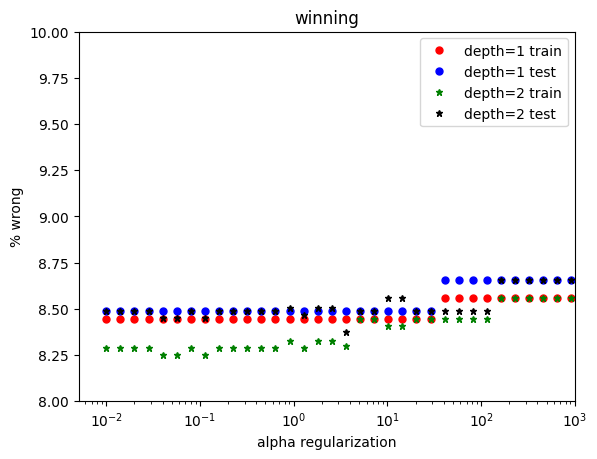

In [116]:
w2op1=np.loadtxt('take_open_win3_xgb_depth1.txt')
w2op2=np.loadtxt('take_open_win3_xgb_depth2.txt')

plt.plot(w2op1[0,:],100*w2op1[2,:],'o',ms=5,color='red',label='depth=1 train') 
plt.plot(w2op1[0,:],100*w2op1[3,:],'o',ms=5,color='blue',label='depth=1 test') 
plt.plot(w2op2[0,:],100*w2op2[2,:],'*',ms=5,color='green',label='depth=2 train') 
plt.plot(w2op2[0,:],100*w2op2[3,:],'*',ms=5,color='black',label='depth=2 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,1000)
plt.ylim(8,10)
plt.xlabel("alpha regularization")
plt.title("winning")
plt.ylabel("% wrong")

In [117]:
for i in range(1,3):
    loop_reg(df_hum_feature_train3,df_hum_target_train3,df_hum_feature_test3,df_hum_target_test3 ,i,0.01,1.414,40,'take_open_hum3_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.0998 seconds
percentage wrong test 8.48
percentage wrong train 8.29 
doing case 1
xgb took 0.0494 seconds
percentage wrong test 8.48
percentage wrong train 8.29 
doing case 2
xgb took 0.0633 seconds
percentage wrong test 8.48
percentage wrong train 8.29 
doing case 3
xgb took 0.0561 seconds
percentage wrong test 8.48
percentage wrong train 8.29 
doing case 4
xgb took 0.0458 seconds
percentage wrong test 8.48
percentage wrong train 8.29 
doing case 5
xgb took 0.0515 seconds
percentage wrong test 8.48
percentage wrong train 8.29 
doing case 6
xgb took 0.0479 seconds
percentage wrong test 8.48
percentage wrong train 8.29 
doing case 7
xgb took 0.049 seconds
percentage wrong test 8.48
percentage wrong train 8.29 
doing case 8
xgb took 0.0434 seconds
percentage wrong test 8.48
percentage wrong train 8.29 
doing case 9
xgb took 0.0535 seconds
percentage wrong test 8.48
percentage wrong train 8.29 
doing case 10
xgb took 0.0479 seconds
percentage wrong test 8.48
percen

Text(0, 0.5, '% wrong')

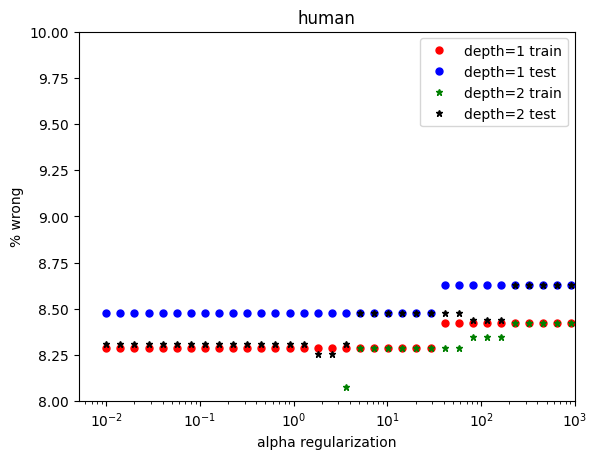

In [118]:
h2op1=np.loadtxt('take_open_hum3_xgb_depth1.txt')
h2op2=np.loadtxt('take_open_hum3_xgb_depth2.txt')

plt.plot(h2op1[0,:],100*h2op1[2,:],'o',ms=5,color='red',label='depth=1 train') 
plt.plot(h2op1[0,:],100*h2op1[3,:],'o',ms=5,color='blue',label='depth=1 test') 
plt.plot(h2op2[0,:],100*h2op2[2,:],'*',ms=5,color='green',label='depth=2 train') 
plt.plot(h2op2[0,:],100*h2op2[3,:],'*',ms=5,color='black',label='depth=2 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,1000)
plt.ylim(8,10)
plt.xlabel("alpha regularization")
plt.title("human")
plt.ylabel("% wrong")

In [119]:
for i in range(1,3):
    loop_reg(df_hum_feature_train3_discard,df_hum_target_train3_discard,df_hum_feature_test3_discard,df_hum_target_test3_discard ,i,0.01,1.414,40,'discard_hum3_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.0959 seconds
percentage wrong test 12.02
percentage wrong train 10.7 
doing case 1
xgb took 0.0322 seconds
percentage wrong test 12.02
percentage wrong train 10.7 
doing case 2
xgb took 0.0299 seconds
percentage wrong test 12.02
percentage wrong train 10.7 
doing case 3
xgb took 0.0466 seconds
percentage wrong test 12.02
percentage wrong train 10.7 
doing case 4
xgb took 0.0307 seconds
percentage wrong test 12.02
percentage wrong train 10.7 
doing case 5
xgb took 0.0355 seconds
percentage wrong test 12.02
percentage wrong train 10.7 
doing case 6
xgb took 0.0314 seconds
percentage wrong test 12.02
percentage wrong train 10.7 
doing case 7
xgb took 0.0313 seconds
percentage wrong test 12.02
percentage wrong train 10.7 
doing case 8
xgb took 0.0485 seconds
percentage wrong test 12.02
percentage wrong train 10.7 
doing case 9
xgb took 0.0367 seconds
percentage wrong test 12.02
percentage wrong train 10.7 
doing case 10
xgb took 0.0479 seconds
percentage wrong test 

Text(0, 0.5, '% wrong')

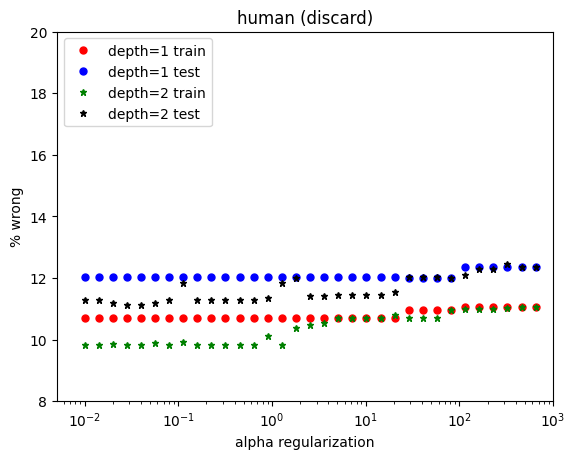

In [121]:
dh2op1=np.loadtxt('discard_hum3_xgb_depth1.txt')
dh2op2=np.loadtxt('discard_hum3_xgb_depth2.txt')

plt.plot(dh2op1[0,:],100*dh2op1[2,:],'o',ms=5,color='red',label='depth=1 train') 
plt.plot(dh2op1[0,:],100*dh2op1[3,:],'o',ms=5,color='blue',label='depth=1 test') 
plt.plot(dh2op2[0,:],100*dh2op2[2,:],'*',ms=5,color='green',label='depth=2 train') 
plt.plot(dh2op2[0,:],100*dh2op2[3,:],'*',ms=5,color='black',label='depth=2 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,1000)
plt.ylim(8,20)
plt.xlabel("alpha regularization")
plt.title("human (discard)")
plt.ylabel("% wrong")

In [122]:
for i in range(1,3):
    loop_reg(df_win_feature_train3_discard,df_win_target_train3_discard,df_win_feature_test3_discard,df_win_target_test3_discard ,i,0.01,1.414,40,'discard_win3_xgb_depth'+str(i)+'.txt',False)

doing case 0
xgb took 0.094 seconds
percentage wrong test 14.78
percentage wrong train 12.61 
doing case 1
xgb took 0.0328 seconds
percentage wrong test 14.78
percentage wrong train 12.61 
doing case 2
xgb took 0.0315 seconds
percentage wrong test 14.78
percentage wrong train 12.61 
doing case 3
xgb took 0.0476 seconds
percentage wrong test 14.78
percentage wrong train 12.61 
doing case 4
xgb took 0.0352 seconds
percentage wrong test 14.78
percentage wrong train 12.61 
doing case 5
xgb took 0.032 seconds
percentage wrong test 14.78
percentage wrong train 12.61 
doing case 6
xgb took 0.033 seconds
percentage wrong test 14.78
percentage wrong train 12.61 
doing case 7
xgb took 0.0314 seconds
percentage wrong test 14.78
percentage wrong train 12.61 
doing case 8
xgb took 0.044 seconds
percentage wrong test 14.78
percentage wrong train 12.61 
doing case 9
xgb took 0.0314 seconds
percentage wrong test 14.78
percentage wrong train 12.61 
doing case 10
xgb took 0.0331 seconds
percentage wrong

Text(0, 0.5, '% wrong')

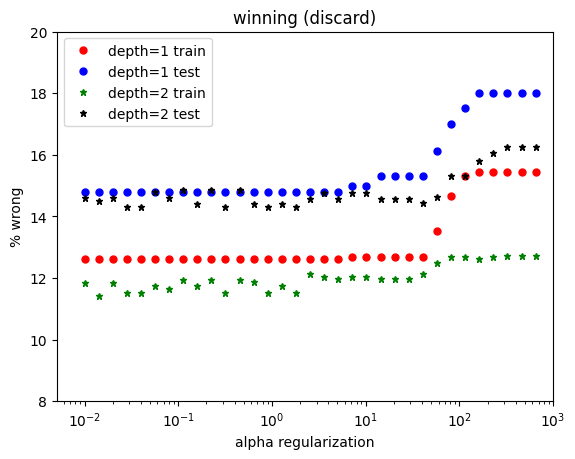

In [123]:
dw2op1=np.loadtxt('discard_win3_xgb_depth1.txt')
dw2op2=np.loadtxt('discard_win3_xgb_depth2.txt')

plt.plot(dw2op1[0,:],100*dw2op1[2,:],'o',ms=5,color='red',label='depth=1 train') 
plt.plot(dw2op1[0,:],100*dw2op1[3,:],'o',ms=5,color='blue',label='depth=1 test') 
plt.plot(dw2op2[0,:],100*dw2op2[2,:],'*',ms=5,color='green',label='depth=2 train') 
plt.plot(dw2op2[0,:],100*dw2op2[3,:],'*',ms=5,color='black',label='depth=2 test') 
plt.legend(loc="best")
plt.xscale('log')
plt.xlim(0,1000)
plt.ylim(8,20)
plt.xlabel("alpha regularization")
plt.title("winning (discard)")
plt.ylabel("% wrong")

There is still no clear minimum. Since the number of feature is smaller just the minimum is used. Further it is fitted to all data to make it more robust.

In [127]:
list_val_hum=['value_hum2_xgb_depth1.txt','value_hum2_xgb_depth2.txt','value_hum2_xgb_depth3.txt','value_hum2_xgb_depth4.txt','value_hum2_xgb_depth5.txt','value_hum2_xgb_depth6.txt','value_hum2_xgb_depth7.txt','value_hum2_xgb_depth8.txt']
#now not executed again to use this models for some runs to have enough samples 
#find_best(list_val_hum,df_hum_sel_value.iloc[:,0:11],df_hum_sel_value.iloc[:,11],'xgb_value_hum2.json')

minimum of 1.46 points is at alpha=72.2 and max_depth=8


In [129]:
list_val_win=['value_win2_xgb_depth1.txt','value_win2_xgb_depth2.txt','value_win2_xgb_depth3.txt','value_win2_xgb_depth4.txt','value_win2_xgb_depth5.txt','value_win2_xgb_depth6.txt','value_win2_xgb_depth7.txt','value_win2_xgb_depth8.txt']
#now not executed again to use this models for some runs to have enough samples 
#find_best(list_val_win,df_win_sel_value.iloc[:,0:11],df_win_sel_value.iloc[:,11],'xgb_value_win2.json')

minimum of 1.46 points is at alpha=36.11 and max_depth=3


In [137]:
list_op_hum=['take_open_hum3_xgb_depth1.txt','take_open_hum3_xgb_depth2.txt']
#now not executed again to use this models for some runs to have enough samples 
#find_best(list_op_hum,df_hum_sel2_open.iloc[:,0:2],df_hum_sel2_open.iloc[:,2],'xgb_open_hum2.json',regression=False)

minimum of 8.25 % is at alpha=1.81 and max_depth=2


In [138]:
list_op_win=['take_open_win3_xgb_depth1.txt','take_open_win3_xgb_depth2.txt']
#now not executed again to use this models for some runs to have enough samples 
#find_best(list_op_win,df_win_sel2_open.iloc[:,0:2],df_win_sel2_open.iloc[:,2],'xgb_open_win2.json',regression=False)

minimum of 8.38 % is at alpha=3.61 and max_depth=2


In [140]:
list_dis_hum=['discard_hum3_xgb_depth1.txt','discard_hum3_xgb_depth2.txt']
#now not executed again to use this models for some runs to have enough samples 
#find_best(list_dis_hum,df_hum_sel2_discard.iloc[:,0:2],df_hum_sel2_discard.iloc[:,2],'xgb_discard_hum2.json',regression=False)

minimum of 11.12 % is at alpha=0.03 and max_depth=2


In [141]:
list_dis_win=['discard_win3_xgb_depth1.txt','discard_win3_xgb_depth2.txt']
#now not executed again to use this models for some runs to have enough samples 
#find_best(list_dis_win,df_win_sel2_discard.iloc[:,0:2],df_win_sel2_discard.iloc[:,2],'xgb_discard_win2.json',regression=False)

minimum of 14.3 % is at alpha=0.03 and max_depth=2


In [144]:
#the columns used
print(df_hum_sel2_open.columns,df_hum_sel2_discard.columns)

Index(['open_pile_card', 'own_max', 'action_take_open', 'entry_number'], dtype='object') Index(['own_max', 'discard_value', 'action_discard', 'entry_number'], dtype='object')


This still seems not to be an improvement. Maybe I need to add something to intentify card for vanishing. 

In [275]:
print(df_hum_feature_train2.columns)

Index(['open_pile_card', 'own_n_closed', 'own_n_open', 'own_sum', 'own_max',
       'other_player_n_closed', 'other_player_n_open', 'other_player_sum',
       'other_player_max'],
      dtype='object')


In [202]:
res=df_hum.groupby(df_hum.open_pile_card).mean()

In [55]:
print(res)

                acting_player  number_of_-2_in_open  number_of_-1_in_open  \
open_pile_card                                                              
-2.0                      0.0              0.057143              0.114286   
-1.0                      0.0              0.031496              0.062992   
 0.0                      0.0              0.074380              0.119835   
 1.0                      0.0              0.037815              0.084034   
 2.0                      0.0              0.044510              0.109792   
 3.0                      0.0              0.045024              0.101896   
 4.0                      0.0              0.052459              0.122951   
 5.0                      0.0              0.037196              0.125894   
 6.0                      0.0              0.048387              0.129032   
 7.0                      0.0              0.032297              0.141148   
 8.0                      0.0              0.043735              0.140662   

In [118]:
list_f=[f for f in os.listdir(myPath) 
    if (f.startswith('human_computer5_g')) and os.path.isfile(os.path.join(myPath, f))]
list_f.sort()
games_stat=np.zeros((4,len(list_f)))
for i in range(len(list_f)):
    print(i)
    a=np.loadtxt(list_f[i])
    print(np.mean(a[1,:]))
    df2=pd.DataFrame(data = a.T, index=range(a.shape[1]),columns = columns2)
    games_stat[0,i]=i
    games_stat[1,i]=np.mean(a[1,:])
    games_stat[2,i]=df2.iloc[:,44][(df2.iloc[:,44]!=30)].mean()
    games_stat[3,i]=df2.iloc[:,44][(df2.iloc[:,44]!=30)].std()/np.sqrt(df2.iloc[:,44][(df2.iloc[:,44]!=30)].sum())
    print(games_stat[2,i])
#46 to  50 one run of game with more global variables  
#and 51 to 53

0
6.130434782608695
4.2875
1
6.63013698630137
4.666666666666667
2
6.15
4.706896551724138
3
7.976470588235294
7.861538461538461
4
6.885416666666667
4.552238805970149
5
7.571428571428571
7.5055555555555555
6
8.875
8.91764705882353
7
6.611111111111111
4.956521739130435
8
7.876712328767123
7.649122807017544
9
6.657534246575342
4.790697674418604
10
6.260273972602739
4.948717948717949
11
6.753968253968254
5.232876712328767
12
7.01010101010101
5.734375
13
6.040404040404041
4.333333333333333
14
7.261363636363637
5.446153846153846
15
8.232558139534884
8.285714285714286
16
6.077669902912621
5.206896551724138
17
6.972222222222222
5.185714285714286
18
8.378947368421052
7.733333333333333
19
8.309734513274336
8.568181818181818
20
8.065573770491802
8.644444444444444
21
8.785714285714286
8.423728813559322
22
6.65934065934066
4.966666666666667
23
6.726190476190476
5.0
24
6.2745098039215685
4.3
25
6.598639455782313
4.963636363636364
26
8.292307692307693
6.964285714285714
27
8.722222222222221
7.908163265

In [107]:
print(columns2)
print(a.shape)

['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker', 

discard_value


Text(0, 0.5, 'points')

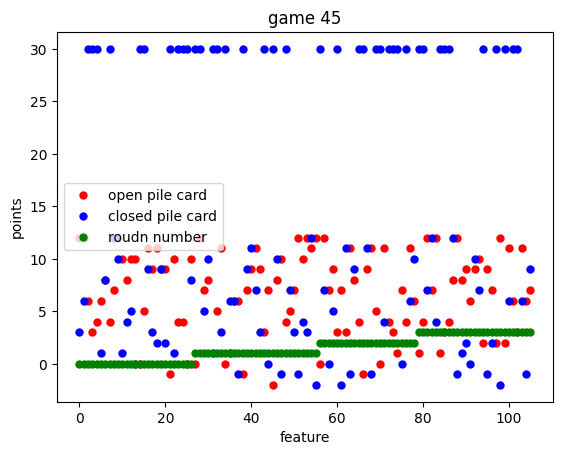

In [108]:
print(columns2[44])
plt.plot(range(106),a[1,:],'o',ms=5,color='red',label='open pile card') 
plt.plot(range(106),a[44,:],'o',ms=5,color='blue',label='closed pile card') 
plt.plot(range(106),a[51,:],'o',ms=5,color='green',label='roudn number') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(-1,1)
#plt.xticks(rotation=65, ha='right')
plt.title("game 45")
plt.xlabel("feature")
plt.ylabel("points")

Seem to that create has some problem in games for sure, likely also rounds. 

Text(0, 0.5, 'points')

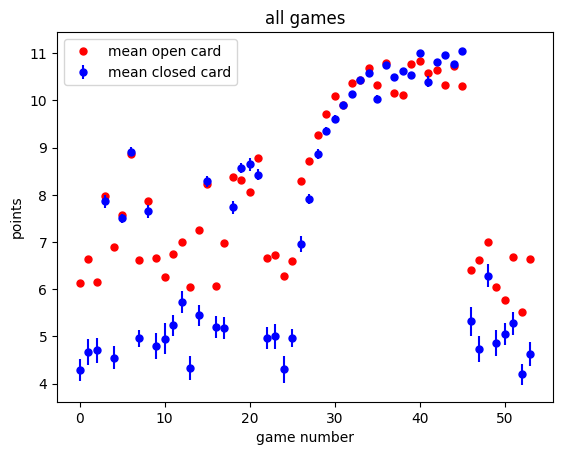

In [120]:
plt.plot(games_stat[0,:],games_stat[1,:],'o',ms=5,color='red',label='mean open card') 
plt.errorbar(games_stat[0,:],games_stat[2,:], yerr=games_stat[3,:],ms=5, fmt='o',color='blue',label='mean closed card')
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(-1,1)
#plt.xticks(rotation=65, ha='right')
plt.title("all games")
plt.xlabel("game number")
plt.ylabel("points")

Forgotten global caused the piles to worsen. Looks now good. Closed should better be better than open because open gets the too bad cards of closed and deck. Average shoudl be 5.07 in closed deviation from it is likely just random. 

In [99]:
pile_closed=Pile('create_closed',False)
print(pile_closed)

Pile has length of 150 Cards and is closed. Its position is at [20, 10]


Text(0, 0.5, 'points')

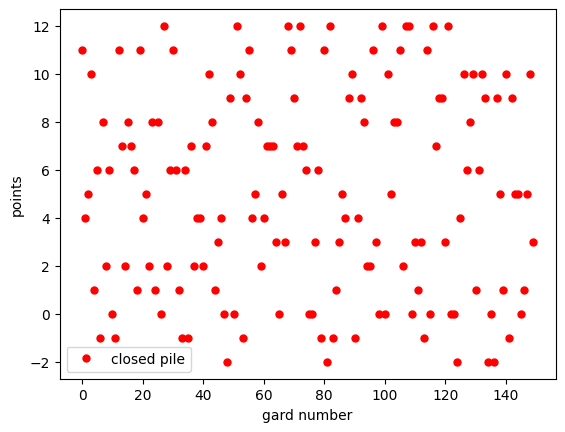

In [105]:
res=np.zeros((2,150))
for i in range(150):
    res[0,i]=i
    res[1,i]=pile_closed.list_cards[i].number
plt.plot(res[0,:],res[1,:],'o',ms=5,color='red',label='closed pile') 
plt.legend(loc="best")
#plt.xscale("log")
#plt.ylim(-1,1)
#plt.xticks(rotation=65, ha='right')
plt.title("")
plt.xlabel("card number")
plt.ylabel("points")

In [121]:
print(a[44,:])

[ 3.  6. 30. 30. 30.  1.  8. 30. 12. 10.  1.  4.  5.  0. 30. 30.  9.  3.
  2.  9.  2. 30.  1. 30. 30. 30.  8. 30. 30.  5. 10. 30. 30.  3. 30.  6.
  6. -1. 30.  9. 11.  7.  3. 30.  0. 30. 10. -1. 30.  7.  3. -1.  4.  3.
 12. -2. 30.  7.  0.  5. 30. -2. 11. -1.  9. 30. 30. 11. -1. 30. 30.  4.
 30. 30. 30.  0. 30.  6. 10. 30. 30.  7. 12.  4. 30. 30. 30. 12. -1.  1.
  2.  0. 10.  7. 30. -1.  2. 30. -2. 30.  6. 30. 30.  6. -1.  9.]


In [ ]:
#some double data is better excluded from previous fits (but small impact since not much affected)